# **Project: Stock Market Forecasting**

## **Importing libraries**

In [120]:
import pandas as pd
import yfinance as yf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler

## **Data Collection**

In [121]:
df = yf.download(tickers= '^NSEI', start= '2013-03-01', end="2023-02-28")
df

[*********************100%***********************]  1 of 1 completed


Open          High           Low         Close  \
Date                                                                 
2013-03-01   5702.450195   5739.450195   5679.899902   5719.700195   
2013-03-04   5704.700195   5712.000000   5663.600098   5698.500000   
2013-03-05   5722.450195   5790.100098   5722.399902   5784.250000   
2013-03-06   5816.399902   5828.700195   5795.049805   5818.600098   
2013-03-07   5801.299805   5878.000000   5801.299805   5863.299805   
...                  ...           ...           ...           ...   
2023-02-21  17905.800781  17924.900391  17800.300781  17826.699219   
2023-02-22  17755.349609  17772.500000  17529.449219  17554.300781   
2023-02-23  17574.650391  17620.050781  17455.400391  17511.250000   
2023-02-24  17591.349609  17599.750000  17421.800781  17465.800781   
2023-02-27  17428.599609  17451.599609  17299.000000  17392.699219   

               Adj Close  Volume  
Date                              
2013-03-01   5719.700195  174500  
2013-03-04   5698.500000  144900  
2013-03-05   5784.250000  154400  
2013-03-06   5818.600098  156900  
2013-03-07   5863.299805  134700  
...                  ...     ...  
2023-02-21  17826.699219  198200  
2023-02-22  17554.300781  204000  
2023-02-23  17511.250000  240800  
2023-02-24  17465.800781  209400  
2023-02-27  17392.699219  246400  

[2453 rows x 6 columns]

## **EDA**

In [122]:
df.columns                      #shows the name of the coulmns/variables present in data

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')

In [123]:
df.shape                        #shape of the stock data

(2453, 6)

In [124]:
df.dtypes                       #data types of Stock data

Open         float64
High         float64
Low          float64
Close        float64
Adj Close    float64
Volume         int64
dtype: object

In [125]:
df.describe()                   # describe the data in terms of total no of values(counts), means of the variables(mean), std, min, max etc.

Open          High           Low         Close     Adj Close  \
count   2453.000000   2453.000000   2453.000000   2453.000000   2453.000000   
mean   10810.197780  10863.327360  10737.595080  10801.820303  10801.820303   
std     3623.735814   3638.591688   3600.227480   3621.037046   3621.037046   
min     5233.450195   5317.700195   5118.850098   5285.000000   5285.000000   
25%     8132.950195   8180.200195   8088.600098   8128.750000   8128.750000   
50%    10232.950195  10290.650391  10175.099609  10230.849609  10230.849609   
75%    12110.200195  12147.400391  12024.500000  12080.849609  12080.849609   
max    18871.949219  18887.599609  18778.199219  18812.500000  18812.500000   

             Volume  
count  2.453000e+03  
mean   2.994762e+05  
std    2.013999e+05  
min    0.000000e+00  
25%    1.651000e+05  
50%    2.295000e+05  
75%    3.632000e+05  
max    1.811000e+06

In [126]:
df.info()                        #provides information related to total rows(enteries) & columns,index of columns, total non-null count and data types.  

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2453 entries, 2013-03-01 to 2023-02-27
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       2453 non-null   float64
 1   High       2453 non-null   float64
 2   Low        2453 non-null   float64
 3   Close      2453 non-null   float64
 4   Adj Close  2453 non-null   float64
 5   Volume     2453 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 134.1 KB


#### **Open vs year**

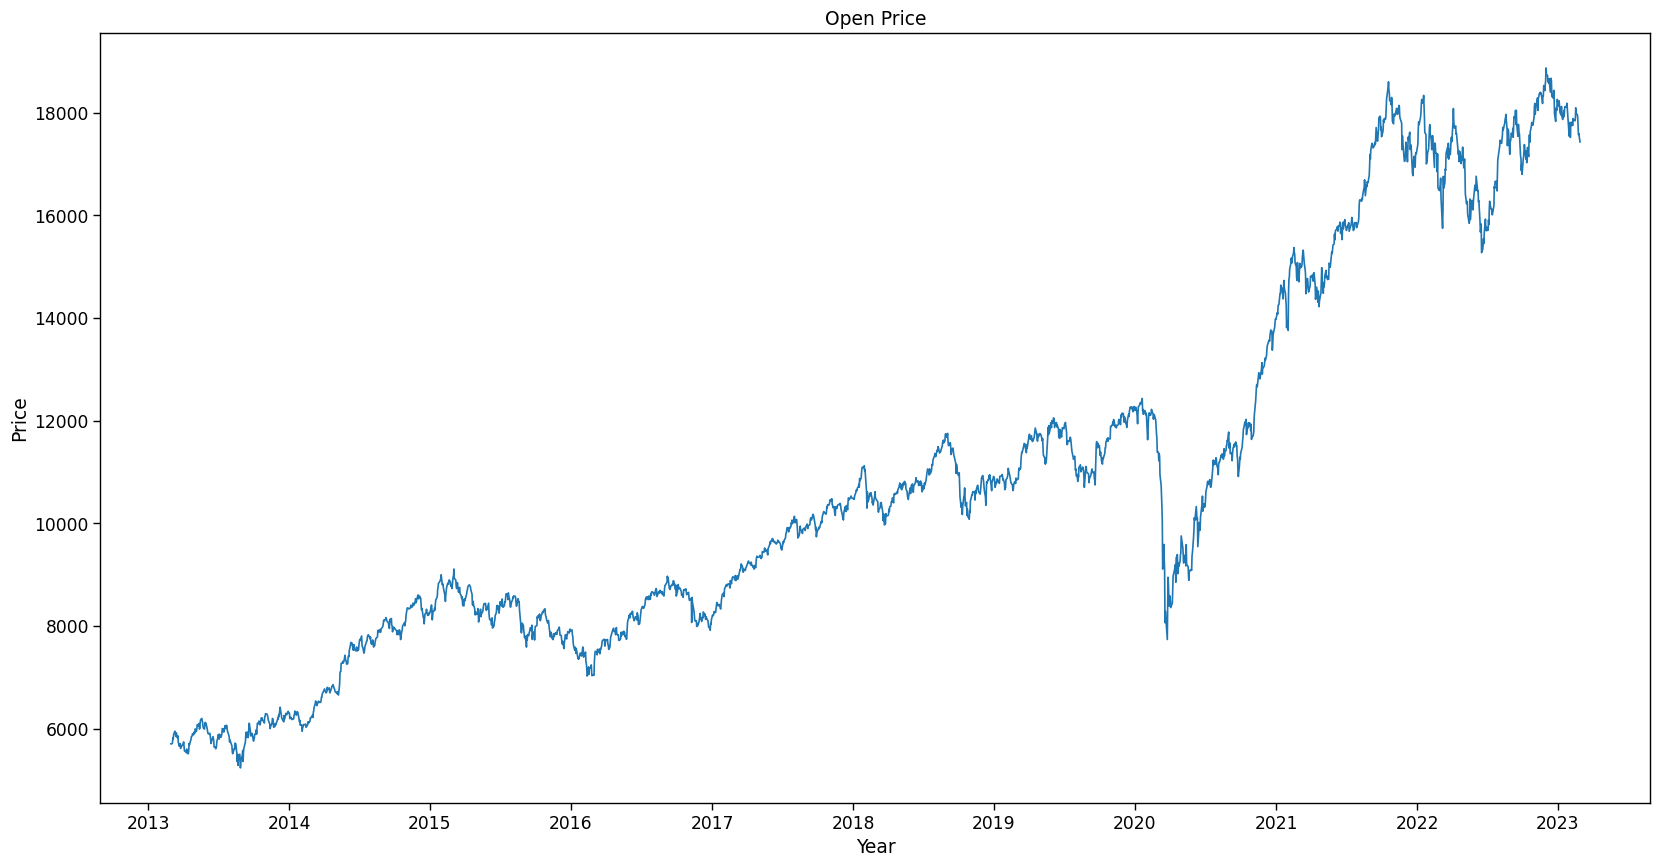

In [129]:
plt.figure(figsize = (20,10))
plt.plot(df['Open'])
plt.title('Open Price')
plt.xlabel('Year')
plt.ylabel('Price')
plt.show()

#### **Open and Close**

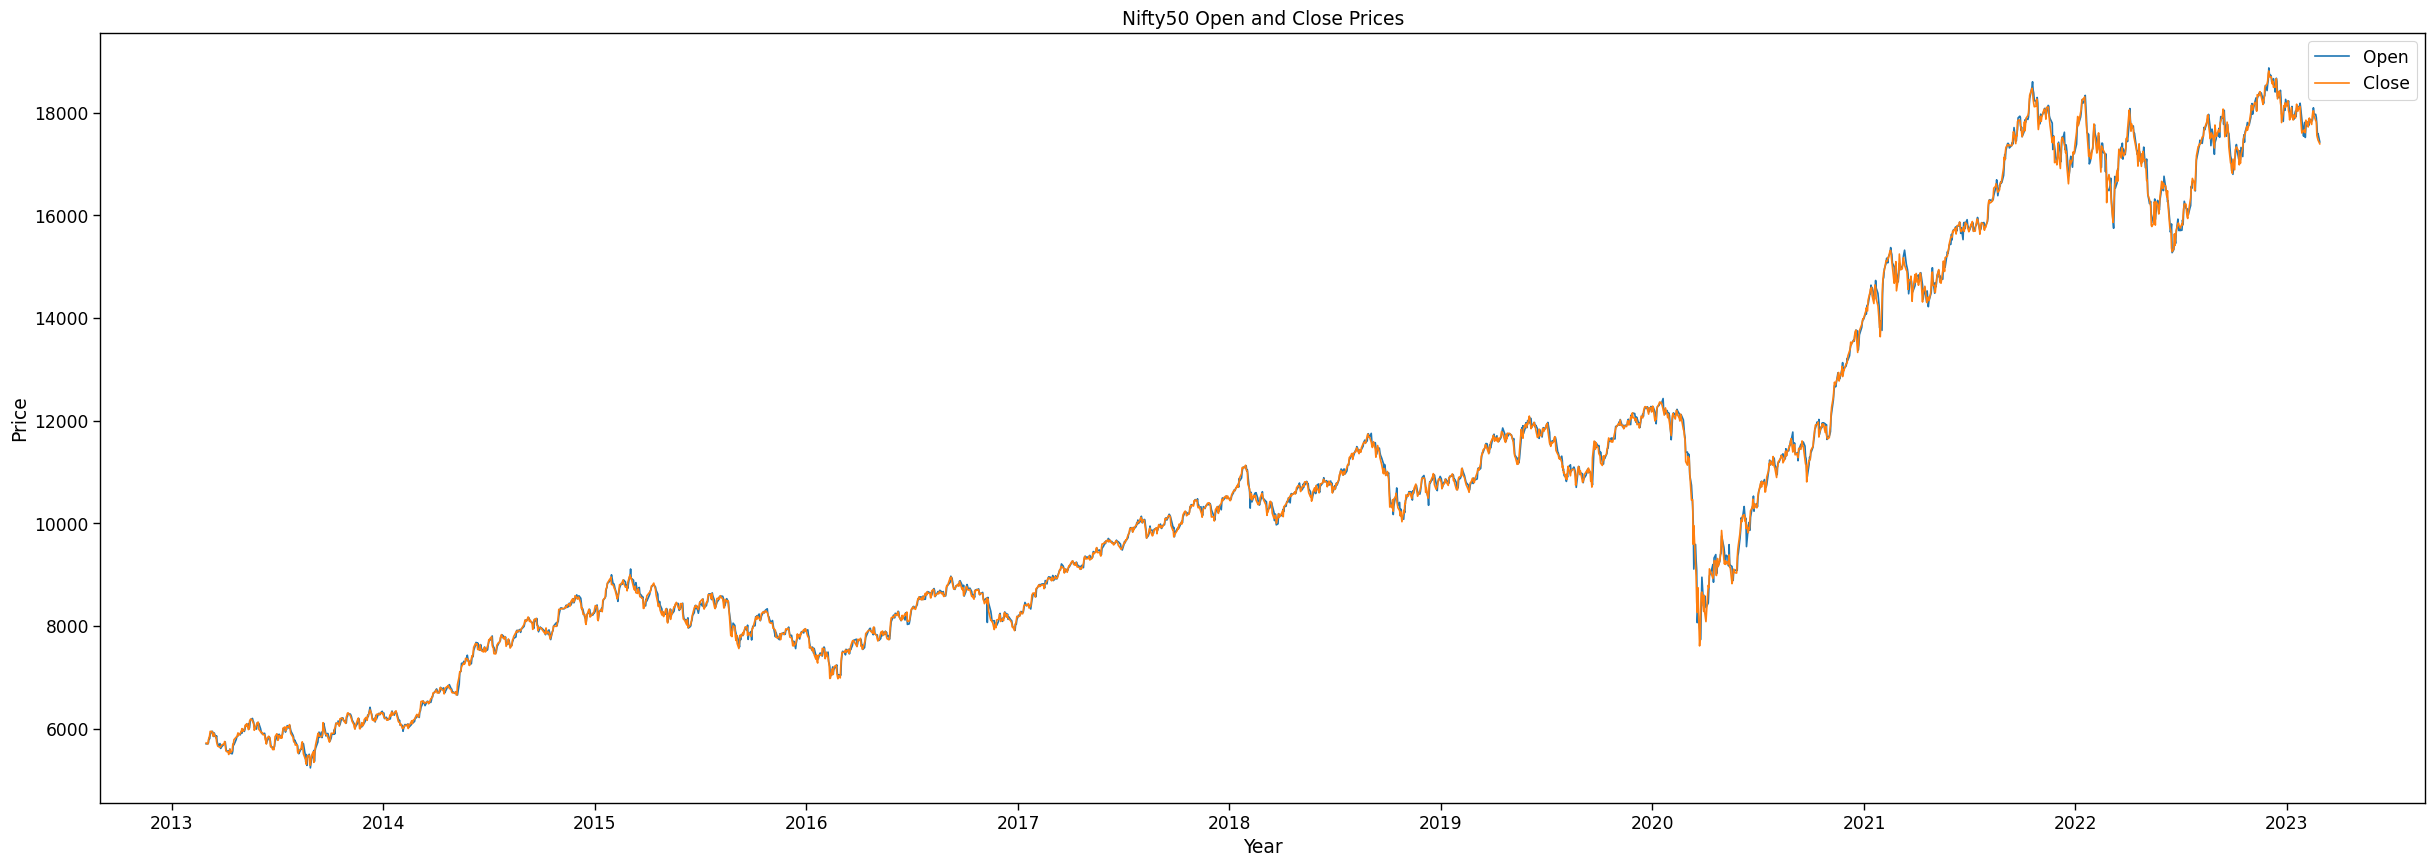

In [130]:
plt.figure(figsize = (30,10))
plt.plot(df['Open'])
plt.plot(df['Close'])
plt.title('Nifty50 Open and Close Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['Open', 'Close'])
plt.show()

#### **High and Low**

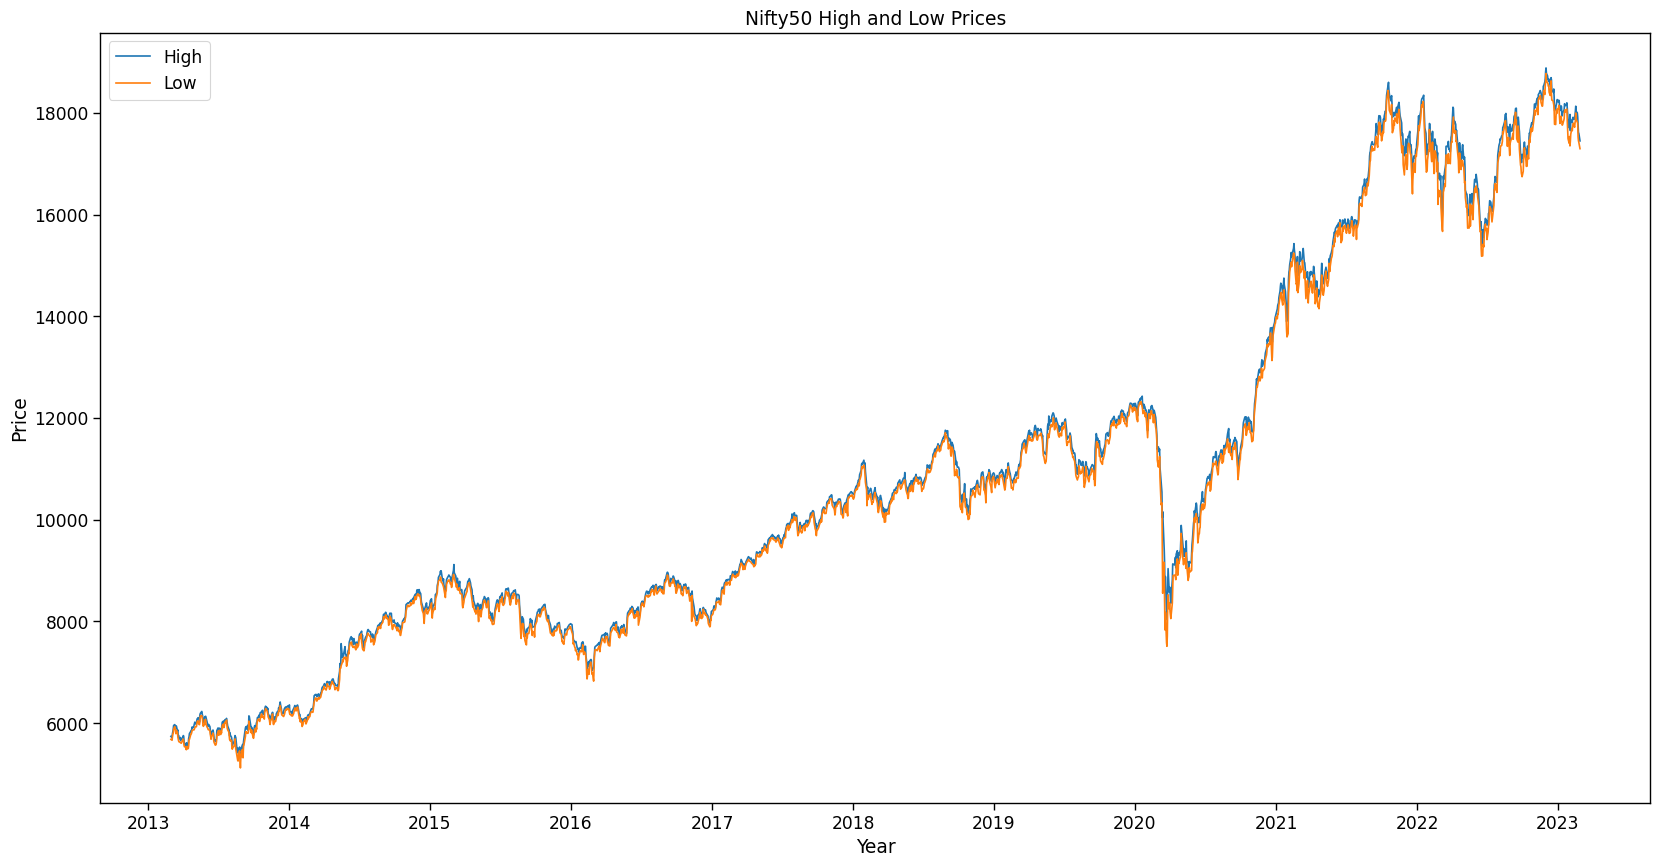

In [131]:
plt.figure(figsize = (20,10))
plt.plot(df['High'])
plt.plot(df['Low'])
plt.title('Nifty50 High and Low Prices')
plt.xlabel('Year')
plt.ylabel('Price')
plt.legend(['High', 'Low'])
plt.show()

#### **Pair Plot**

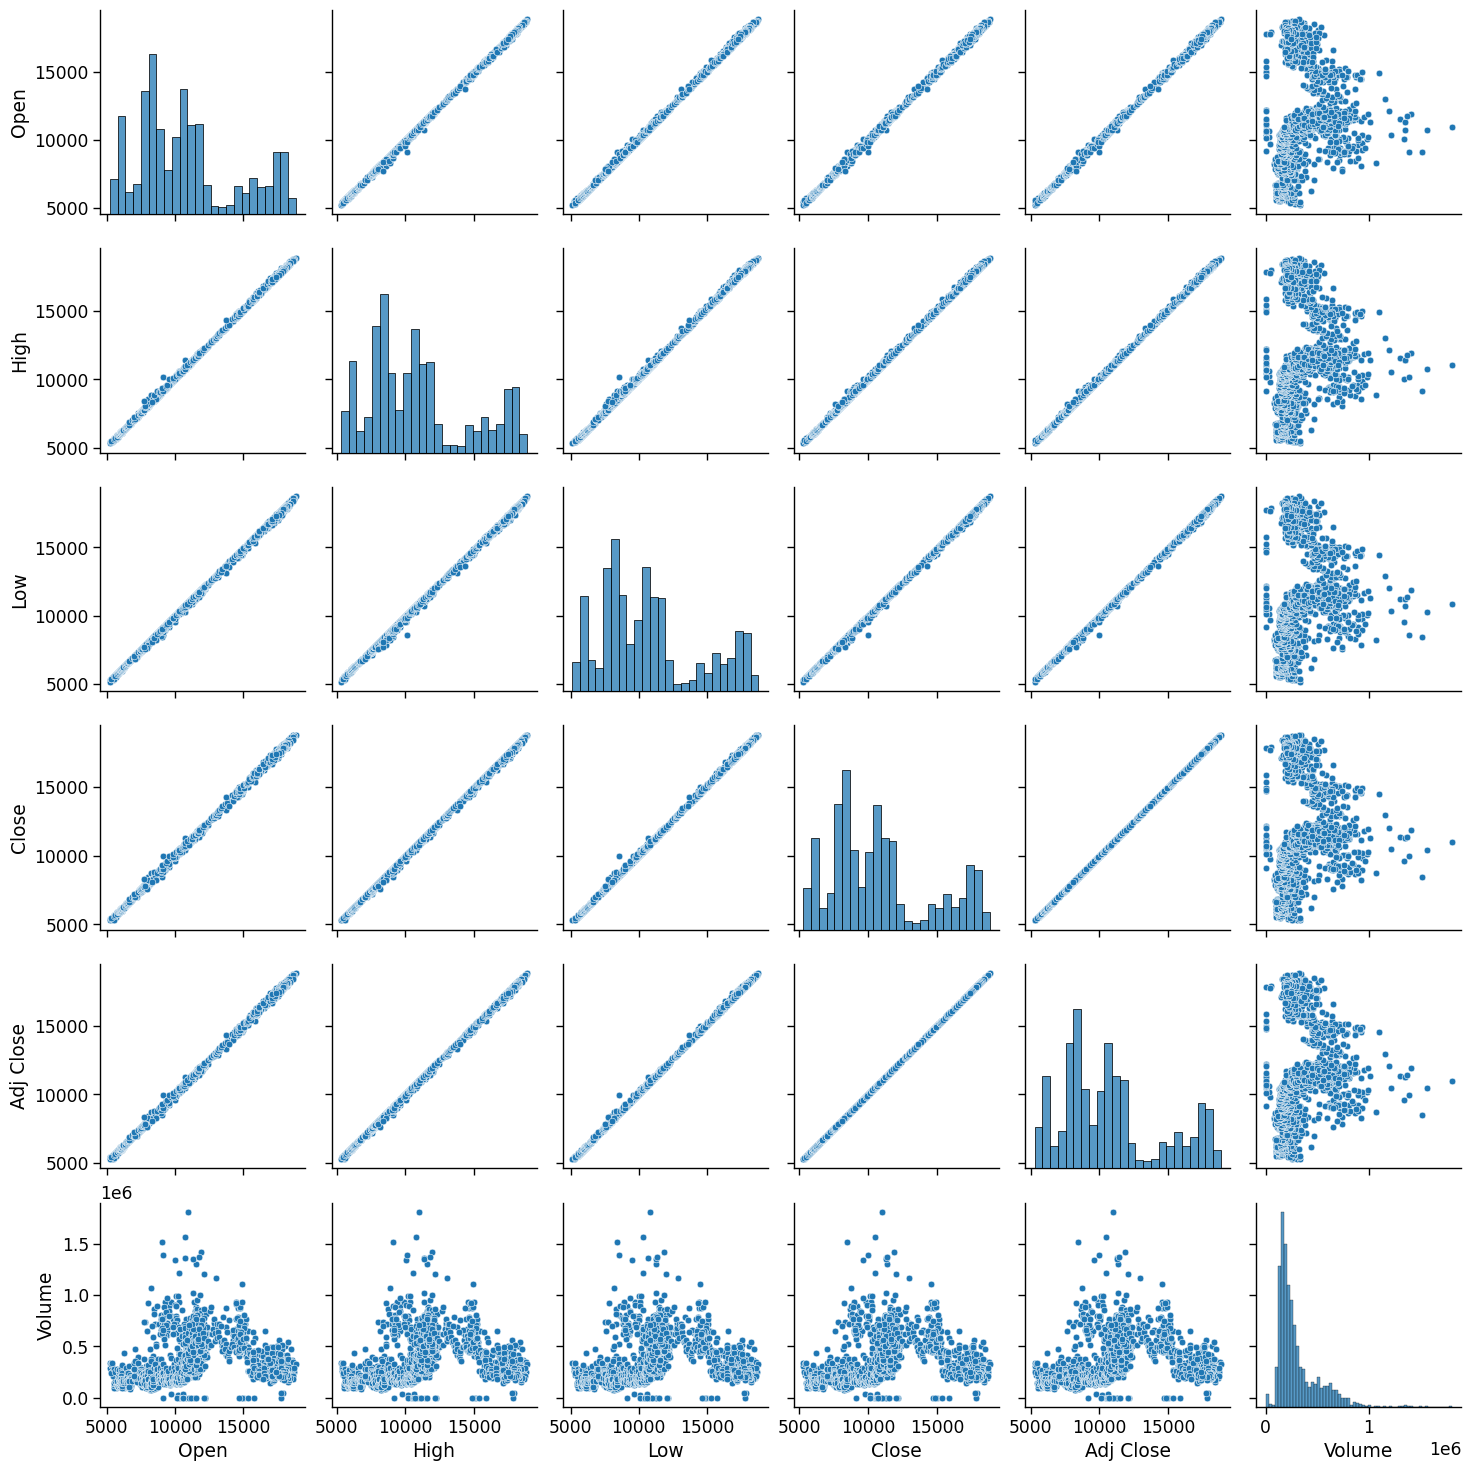

In [132]:
sns.pairplot(df, palette='Blues')

## **Technical Indicators as features**

In [133]:
df["SMA_20"] = df['Open'].rolling(window=20).mean()              #Simple Moving Average with a window of 20 days
df["SMA_50"] = df['Open'].rolling(window=50).mean()              #Simple Moving Avearge with a window of 50 days
df['EMA_5'] = df['Open'].ewm(span=20, adjust=False).mean()       #Exponential Moving Average with a span of 20 days

In [134]:
df['Returns'] = df['Open'].pct_change()                           #Calculates the daily returns by taking the percentage change of 'Adj Close' column       

In [135]:
df['Volatility'] = df['Returns'].rolling(window=20).std()               #Calculates the 20-day rolling standard deviation of 'Returns'.

In [136]:
import talib

In [137]:
df['RSI'] = talib.RSI(df['Open'], timeperiod=14)                   #Calculates the Relative Strength Index (RSI) using the 'talib' library with a time period of 14

#Calculates the Slow Stochastic Oscillator using the 'talib' library with a SlowK period of 14 and a SlowD period of 3.
df['Stoch_slowk'], df['Stoch_slowd'] = talib.STOCH(df['High'], df['Low'], df['Open'], slowk_period=14, slowd_period=3)

#Calculates the Moving Average Convergence Divergence (MACD) using the 'talib' library with a fast period of 12, a slow period of 26, and a signal period of 9.
df['Macd'], df['Macd_signal'], df['Macd_hist'] = talib.MACD(df['Open'], fastperiod=12, slowperiod=26, signalperiod=9)

In [138]:
df


Open          High           Low         Close  \
Date                                                                 
2013-03-01   5702.450195   5739.450195   5679.899902   5719.700195   
2013-03-04   5704.700195   5712.000000   5663.600098   5698.500000   
2013-03-05   5722.450195   5790.100098   5722.399902   5784.250000   
2013-03-06   5816.399902   5828.700195   5795.049805   5818.600098   
2013-03-07   5801.299805   5878.000000   5801.299805   5863.299805   
...                  ...           ...           ...           ...   
2023-02-21  17905.800781  17924.900391  17800.300781  17826.699219   
2023-02-22  17755.349609  17772.500000  17529.449219  17554.300781   
2023-02-23  17574.650391  17620.050781  17455.400391  17511.250000   
2023-02-24  17591.349609  17599.750000  17421.800781  17465.800781   
2023-02-27  17428.599609  17451.599609  17299.000000  17392.699219   

               Adj Close  Volume        SMA_20        SMA_50         EMA_5  \
Date                                                                         
2013-03-01   5719.700195  174500           NaN           NaN   5702.450195   
2013-03-04   5698.500000  144900           NaN           NaN   5702.664481   
2013-03-05   5784.250000  154400           NaN           NaN   5704.548835   
2013-03-06   5818.600098  156900           NaN           NaN   5715.201317   
2013-03-07   5863.299805  134700           NaN           NaN   5723.401173   
...                  ...     ...           ...           ...           ...   
2023-02-21  17826.699219  198200  17855.367383  18033.647031  17909.716633   
2023-02-22  17554.300781  204000  17833.937402  18018.266016  17895.015012   
2023-02-23  17511.250000  240800  17808.002441  17996.334023  17864.504096   
2023-02-24  17465.800781  209400  17793.709961  17975.873008  17838.489383   
2023-02-27  17392.699219  246400  17788.042480  17958.063008  17799.452261   

             Returns  Volatility        RSI  Stoch_slowk  Stoch_slowd  \
Date                                                                    
2013-03-01       NaN         NaN        NaN          NaN          NaN   
2013-03-04  0.000395         NaN        NaN          NaN          NaN   
2013-03-05  0.003111         NaN        NaN          NaN          NaN   
2013-03-06  0.016418         NaN        NaN          NaN          NaN   
2013-03-07 -0.002596         NaN        NaN          NaN          NaN   
...              ...         ...        ...          ...          ...   
2023-02-21 -0.003326    0.008468  49.101041    62.989488    64.205340   
2023-02-22 -0.008402    0.008582  43.893161    63.765631    63.957198   
2023-02-23 -0.010177    0.008780  38.597985    60.985249    62.580123   
2023-02-24  0.000950    0.008432  39.326448    57.694875    60.815252   
2023-02-27 -0.009252    0.007592  34.971806    54.133020    57.604382   

                 Macd  Macd_signal  Macd_hist  
Date                                           
2013-03-01        NaN          NaN        NaN  
2013-03-04        NaN          NaN        NaN  
2013-03-05        NaN          NaN        NaN  
2013-03-06        NaN          NaN        NaN  
2013-03-07        NaN          NaN        NaN  
...               ...          ...        ...  
2023-02-21 -18.498996   -48.986921  30.487925  
2023-02-22 -29.233671   -45.036271  15.802600  
2023-02-23 -51.725634   -46.374144  -5.351490  
2023-02-24 -67.425945   -50.584504 -16.841441  
2023-02-27 -91.941278   -58.855859 -33.085419  

[2453 rows x 17 columns]

In [139]:
df =df.drop('Close', axis=1)

In [140]:
df

Open          High           Low     Adj Close  Volume  \
Date                                                                         
2013-03-01   5702.450195   5739.450195   5679.899902   5719.700195  174500   
2013-03-04   5704.700195   5712.000000   5663.600098   5698.500000  144900   
2013-03-05   5722.450195   5790.100098   5722.399902   5784.250000  154400   
2013-03-06   5816.399902   5828.700195   5795.049805   5818.600098  156900   
2013-03-07   5801.299805   5878.000000   5801.299805   5863.299805  134700   
...                  ...           ...           ...           ...     ...   
2023-02-21  17905.800781  17924.900391  17800.300781  17826.699219  198200   
2023-02-22  17755.349609  17772.500000  17529.449219  17554.300781  204000   
2023-02-23  17574.650391  17620.050781  17455.400391  17511.250000  240800   
2023-02-24  17591.349609  17599.750000  17421.800781  17465.800781  209400   
2023-02-27  17428.599609  17451.599609  17299.000000  17392.699219  246400   

                  SMA_20        SMA_50         EMA_5   Returns  Volatility  \
Date                                                                         
2013-03-01           NaN           NaN   5702.450195       NaN         NaN   
2013-03-04           NaN           NaN   5702.664481  0.000395         NaN   
2013-03-05           NaN           NaN   5704.548835  0.003111         NaN   
2013-03-06           NaN           NaN   5715.201317  0.016418         NaN   
2013-03-07           NaN           NaN   5723.401173 -0.002596         NaN   
...                  ...           ...           ...       ...         ...   
2023-02-21  17855.367383  18033.647031  17909.716633 -0.003326    0.008468   
2023-02-22  17833.937402  18018.266016  17895.015012 -0.008402    0.008582   
2023-02-23  17808.002441  17996.334023  17864.504096 -0.010177    0.008780   
2023-02-24  17793.709961  17975.873008  17838.489383  0.000950    0.008432   
2023-02-27  17788.042480  17958.063008  17799.452261 -0.009252    0.007592   

                  RSI  Stoch_slowk  Stoch_slowd       Macd  Macd_signal  \
Date                                                                      
2013-03-01        NaN          NaN          NaN        NaN          NaN   
2013-03-04        NaN          NaN          NaN        NaN          NaN   
2013-03-05        NaN          NaN          NaN        NaN          NaN   
2013-03-06        NaN          NaN          NaN        NaN          NaN   
2013-03-07        NaN          NaN          NaN        NaN          NaN   
...               ...          ...          ...        ...          ...   
2023-02-21  49.101041    62.989488    64.205340 -18.498996   -48.986921   
2023-02-22  43.893161    63.765631    63.957198 -29.233671   -45.036271   
2023-02-23  38.597985    60.985249    62.580123 -51.725634   -46.374144   
2023-02-24  39.326448    57.694875    60.815252 -67.425945   -50.584504   
2023-02-27  34.971806    54.133020    57.604382 -91.941278   -58.855859   

            Macd_hist  
Date                   
2013-03-01        NaN  
2013-03-04        NaN  
2013-03-05        NaN  
2013-03-06        NaN  
2013-03-07        NaN  
...               ...  
2023-02-21  30.487925  
2023-02-22  15.802600  
2023-02-23  -5.351490  
2023-02-24 -16.841441  
2023-02-27 -33.085419  

[2453 rows x 16 columns]

#### **Correlation Matrix**

In [141]:
corr_matrix = df.corr()       #corr() function find the correlation between each pairs of protein data variables
corr_matrix

Open      High       Low  Adj Close    Volume    SMA_20  \
Open         1.000000  0.999854  0.999807   0.999652  0.297390  0.996414   
High         0.999854  1.000000  0.999743   0.999838  0.301116  0.996764   
Low          0.999807  0.999743  1.000000   0.999837  0.291935  0.995823   
Adj Close    0.999652  0.999838  0.999837   1.000000  0.296645  0.996150   
Volume       0.297390  0.301116  0.291935   0.296645  1.000000  0.296199   
SMA_20       0.996414  0.996764  0.995823   0.996150  0.296199  1.000000   
SMA_50       0.990330  0.990960  0.989474   0.990080  0.288050  0.996326   
EMA_5        0.997430  0.997719  0.996888   0.997161  0.301054  0.999815   
Returns      0.011782  0.008857  0.013373   0.010532 -0.009729 -0.019940   
Volatility  -0.059504 -0.054378 -0.064377  -0.059202  0.369426 -0.046866   
RSI          0.076898  0.072370  0.080859   0.076303 -0.019999  0.004982   
Stoch_slowk  0.171823  0.167723  0.174060   0.170609  0.040437  0.114456   
Stoch_slowd  0.175023  0.171524  0.177378   0.174380  0.045571  0.122785   
Macd         0.177530  0.172579  0.181720   0.177035 -0.008078  0.114911   
Macd_signal  0.192658  0.188650  0.196132   0.192330  0.004068  0.148732   
Macd_hist   -0.013636 -0.017553 -0.010583  -0.014260 -0.039796 -0.084494   

               SMA_50     EMA_5   Returns  Volatility       RSI  Stoch_slowk  \
Open         0.990330  0.997430  0.011782   -0.059504  0.076898     0.171823   
High         0.990960  0.997719  0.008857   -0.054378  0.072370     0.167723   
Low          0.989474  0.996888  0.013373   -0.064377  0.080859     0.174060   
Adj Close    0.990080  0.997161  0.010532   -0.059202  0.076303     0.170609   
Volume       0.288050  0.301054 -0.009729    0.369426 -0.019999     0.040437   
SMA_20       0.996326  0.999815 -0.019940   -0.046866  0.004982     0.114456   
SMA_50       1.000000  0.996554 -0.017726    0.004010 -0.035978     0.076269   
EMA_5        0.996554  1.000000 -0.017103   -0.043958  0.014694     0.125308   
Returns     -0.017726 -0.017103  1.000000    0.043054  0.331328     0.062173   
Volatility   0.004010 -0.043958  0.043054    1.000000 -0.270700    -0.257547   
RSI         -0.035978  0.014694  0.331328   -0.270700  1.000000     0.741028   
Stoch_slowk  0.076269  0.125308  0.062173   -0.257547  0.741028     1.000000   
Stoch_slowd  0.079683  0.132863  0.003267   -0.284177  0.687452     0.977553   
Macd         0.045586  0.121007  0.063155   -0.474479  0.753426     0.680802   
Macd_signal  0.067127  0.149755  0.005227   -0.553364  0.622058     0.559031   
Macd_hist   -0.059205 -0.067353  0.194513    0.157537  0.557982     0.513851   

             Stoch_slowd      Macd  Macd_signal  Macd_hist  
Open            0.175023  0.177530     0.192658  -0.013636  
High            0.171524  0.172579     0.188650  -0.017553  
Low             0.177378  0.181720     0.196132  -0.010583  
Adj Close       0.174380  0.177035     0.192330  -0.014260  
Volume          0.045571 -0.008078     0.004068  -0.039796  
SMA_20          0.122785  0.114911     0.148732  -0.084494  
SMA_50          0.079683  0.045586     0.067127  -0.059205  
EMA_5           0.132863  0.121007     0.149755  -0.067353  
Returns         0.003267  0.063155     0.005227   0.194513  
Volatility     -0.284177 -0.474479    -0.553364   0.157537  
RSI             0.687452  0.753426     0.622058   0.557982  
Stoch_slowk     0.977553  0.680802     0.559031   0.513851  
Stoch_slowd     1.000000  0.698120     0.601218   0.438857  
Macd            0.698120  1.000000     0.954213   0.335710  
Macd_signal     0.601218  0.954213     1.000000   0.038570  
Macd_hist       0.438857  0.335710     0.038570   1.000000

#### **Correlation Heat Map**

<Figure size 3000x1000 with 0 Axes>

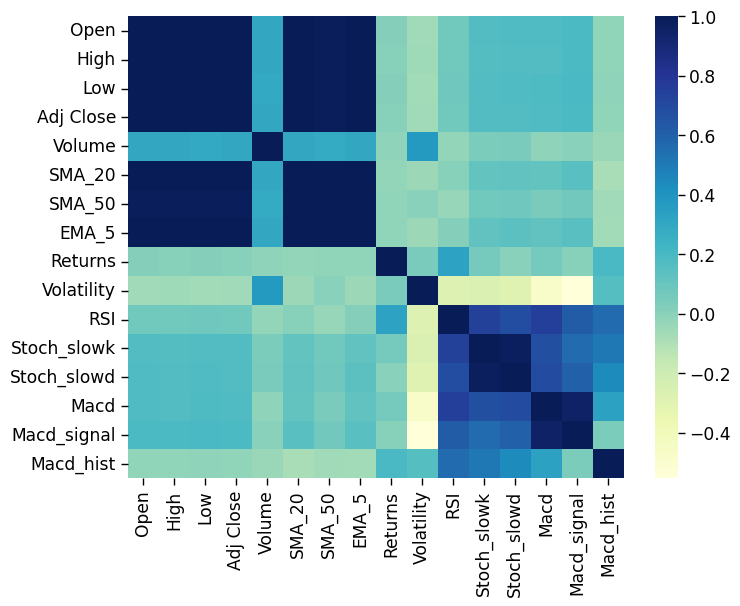

In [142]:
import seaborn as sns              
plt.figure(figsize=(30,10))
plt.figure(figsize=(8,6))
sns.set_context('paper', font_scale=1.4)
sns.heatmap(corr_matrix,cmap='YlGnBu')          #heatmap of corr_matrix having yellow(low corr.),green(moderate) and blue(high) colour
plt.show()      

In [143]:
cor_matrix = corr_matrix.abs()
upper_tri = cor_matrix.where(np.triu(np.ones(cor_matrix.shape),k=1).astype(bool))

# Find features with high correlation and drop them
to_drop = [column for column in upper_tri.columns if any(upper_tri[column] > 0.95)]
print(to_drop)

df.drop(to_drop, axis=1, inplace=True)

['High', 'Low', 'Adj Close', 'SMA_20', 'SMA_50', 'EMA_5', 'Stoch_slowd', 'Macd_signal']


In [144]:
df

Open  Volume   Returns  Volatility        RSI  \
Date                                                                
2013-03-01   5702.450195  174500       NaN         NaN        NaN   
2013-03-04   5704.700195  144900  0.000395         NaN        NaN   
2013-03-05   5722.450195  154400  0.003111         NaN        NaN   
2013-03-06   5816.399902  156900  0.016418         NaN        NaN   
2013-03-07   5801.299805  134700 -0.002596         NaN        NaN   
...                  ...     ...       ...         ...        ...   
2023-02-21  17905.800781  198200 -0.003326    0.008468  49.101041   
2023-02-22  17755.349609  204000 -0.008402    0.008582  43.893161   
2023-02-23  17574.650391  240800 -0.010177    0.008780  38.597985   
2023-02-24  17591.349609  209400  0.000950    0.008432  39.326448   
2023-02-27  17428.599609  246400 -0.009252    0.007592  34.971806   

            Stoch_slowk       Macd  Macd_hist  
Date                                           
2013-03-01          NaN        NaN        NaN  
2013-03-04          NaN        NaN        NaN  
2013-03-05          NaN        NaN        NaN  
2013-03-06          NaN        NaN        NaN  
2013-03-07          NaN        NaN        NaN  
...                 ...        ...        ...  
2023-02-21    62.989488 -18.498996  30.487925  
2023-02-22    63.765631 -29.233671  15.802600  
2023-02-23    60.985249 -51.725634  -5.351490  
2023-02-24    57.694875 -67.425945 -16.841441  
2023-02-27    54.133020 -91.941278 -33.085419  

[2453 rows x 8 columns]

In [145]:
df.columns

Index(['Open', 'Volume', 'Returns', 'Volatility', 'RSI', 'Stoch_slowk', 'Macd',
       'Macd_hist'],
      dtype='object')

#### **Imputing Missing Variables**

In [146]:
from sklearn.experimental import enable_iterative_imputer  #import libraries
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=50, random_state=0)   
df_imputed = imputer.fit_transform(df)                    #estimate the missing values
df = pd.DataFrame(df_imputed, columns=df.columns, index=df.index) #frame a dataset including estimates of missing values
df  

Open    Volume   Returns  Volatility        RSI  \
Date                                                                  
2013-03-01   5702.450195  174500.0 -0.000549    0.009280  55.352007   
2013-03-04   5704.700195  144900.0  0.000395    0.008981  55.356636   
2013-03-05   5722.450195  154400.0  0.003111    0.009075  55.351958   
2013-03-06   5816.399902  156900.0  0.016418    0.009093  55.335207   
2013-03-07   5801.299805  134700.0 -0.002596    0.008868  55.340851   
...                  ...       ...       ...         ...        ...   
2023-02-21  17905.800781  198200.0 -0.003326    0.008468  49.101041   
2023-02-22  17755.349609  204000.0 -0.008402    0.008582  43.893161   
2023-02-23  17574.650391  240800.0 -0.010177    0.008780  38.597985   
2023-02-24  17591.349609  209400.0  0.000950    0.008432  39.326448   
2023-02-27  17428.599609  246400.0 -0.009252    0.007592  34.971806   

            Stoch_slowk       Macd  Macd_hist  
Date                                           
2013-03-01    58.632623  20.725725   4.794473  
2013-03-04    58.577907  21.318102   4.851522  
2013-03-05    58.598863  21.183466   4.816972  
2013-03-06    58.620806  21.417507   4.729109  
2013-03-07    58.576838  21.822406   4.784295  
...                 ...        ...        ...  
2023-02-21    62.989488 -18.498996  30.487925  
2023-02-22    63.765631 -29.233671  15.802600  
2023-02-23    60.985249 -51.725634  -5.351490  
2023-02-24    57.694875 -67.425945 -16.841441  
2023-02-27    54.133020 -91.941278 -33.085419  

[2453 rows x 8 columns]

## **Scaling and Normalization**

In [147]:
scaler = StandardScaler()
df_std = scaler.fit_transform(df)

# # Normalize the data using min-max scaling method
min_max_scaler = MinMaxScaler()
df = pd.DataFrame(min_max_scaler.fit_transform(df_std), columns=df.columns, index=df.index)

# # Print the preprocessed data
df

Open    Volume   Returns  Volatility       RSI  Stoch_slowk  \
Date                                                                          
2013-03-01  0.034388  0.096356  0.546640    0.125318  0.621552     0.522263   
2013-03-04  0.034553  0.080011  0.551234    0.118962  0.621614     0.521352   
2013-03-05  0.035854  0.085257  0.564465    0.120968  0.621551     0.521701   
2013-03-06  0.042743  0.086637  0.629266    0.121330  0.621324     0.522066   
2013-03-07  0.041636  0.074379  0.536670    0.116576  0.621400     0.521334   
...              ...       ...       ...         ...       ...          ...   
2023-02-21  0.929160  0.109442  0.533116    0.108069  0.536801     0.594814   
2023-02-22  0.918129  0.112645  0.508394    0.110489  0.466192     0.607739   
2023-02-23  0.904880  0.132965  0.499751    0.114695  0.394399     0.561439   
2023-02-24  0.906104  0.115627  0.553940    0.107324  0.404276     0.506647   
2023-02-27  0.894171  0.136057  0.504258    0.089487  0.345235     0.447334   

                Macd  Macd_hist  
Date                             
2013-03-01  0.723791   0.564148  
2013-03-04  0.724196   0.564265  
2013-03-05  0.724104   0.564194  
2013-03-06  0.724264   0.564015  
2013-03-07  0.724540   0.564128  
...              ...        ...  
2023-02-21  0.696975   0.616650  
2023-02-22  0.689636   0.586642  
2023-02-23  0.674260   0.543416  
2023-02-24  0.663527   0.519938  
2023-02-27  0.646767   0.486745  

[2453 rows x 8 columns]

#### **Split the data in fetaures and target** 

In [148]:
features = df.drop(['Open'], axis=1)                         
target = df['Open']                                  

In [149]:
features

Volume   Returns  Volatility       RSI  Stoch_slowk      Macd  \
Date                                                                          
2013-03-01  0.096356  0.546640    0.125318  0.621552     0.522263  0.723791   
2013-03-04  0.080011  0.551234    0.118962  0.621614     0.521352  0.724196   
2013-03-05  0.085257  0.564465    0.120968  0.621551     0.521701  0.724104   
2013-03-06  0.086637  0.629266    0.121330  0.621324     0.522066  0.724264   
2013-03-07  0.074379  0.536670    0.116576  0.621400     0.521334  0.724540   
...              ...       ...         ...       ...          ...       ...   
2023-02-21  0.109442  0.533116    0.108069  0.536801     0.594814  0.696975   
2023-02-22  0.112645  0.508394    0.110489  0.466192     0.607739  0.689636   
2023-02-23  0.132965  0.499751    0.114695  0.394399     0.561439  0.674260   
2023-02-24  0.115627  0.553940    0.107324  0.404276     0.506647  0.663527   
2023-02-27  0.136057  0.504258    0.089487  0.345235     0.447334  0.646767   

            Macd_hist  
Date                   
2013-03-01   0.564148  
2013-03-04   0.564265  
2013-03-05   0.564194  
2013-03-06   0.564015  
2013-03-07   0.564128  
...               ...  
2023-02-21   0.616650  
2023-02-22   0.586642  
2023-02-23   0.543416  
2023-02-24   0.519938  
2023-02-27   0.486745  

[2453 rows x 7 columns]

In [150]:
target

Date
2013-03-01    0.034388
2013-03-04    0.034553
2013-03-05    0.035854
2013-03-06    0.042743
2013-03-07    0.041636
                ...   
2023-02-21    0.929160
2023-02-22    0.918129
2023-02-23    0.904880
2023-02-24    0.906104
2023-02-27    0.894171
Name: Open, Length: 2453, dtype: float64

## **Ridge Regression**

#### **Without GridSearch**

In [151]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)


alpha = 0.03

# Training a ridge regression model with the specified hyperparameters
ridge = Ridge(alpha=alpha)
ridge.fit(X_train, y_train)

# Predictions on the test set
y_pred = ridge.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
nrmse = rmse / (y_test.max() - y_test.min())
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("NRMSE:", nrmse)
print("R2 score:", r2)


MAE: 0.18283831311259294
RMSE: 0.23630798971051273
NRMSE: 0.24225396362749138
R2 score: 0.16537052253898243


#### **y_test vs y_pred**

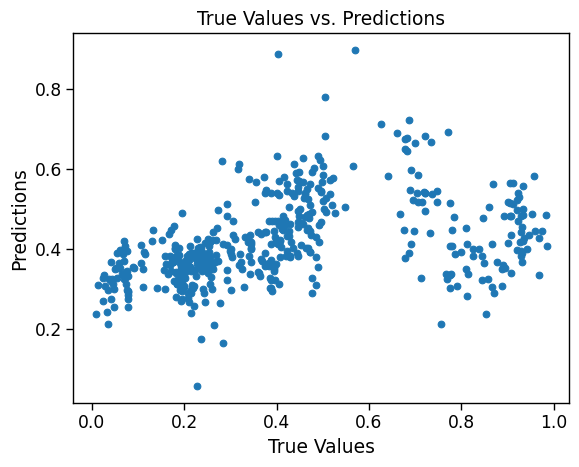

In [152]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.show()


#### **With GridSearch**

In [154]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


# Range of hyperparameters to search
alpha = np.logspace(-6, 6, 100)

# Cross-validation strategy
cv = TimeSeriesSplit(n_splits=5)

# Perform grid search to find the best hyperparameters
ridge_cv = RidgeCV(alphas=alpha, cv=cv)
ridge_cv.fit(X_train, y_train)
best_alpha = ridge_cv.alpha_

# Train a ridge regression model with the best hyperparameters
ridge_best = Ridge(alpha=best_alpha)
ridge_best.fit(X_train, y_train)

# Make predictions on the test set
y_pred = ridge_best.predict(X_test)

 # Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
nrmse = rmse / (y_test.max() - y_test.min())
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("NRMSE:", nrmse)
print("R2 score:", r2)



MAE: 0.18277993211667343
RMSE: 0.23814282981836998
NRMSE: 0.2507090486212367
R2 score: 0.16256563189016737


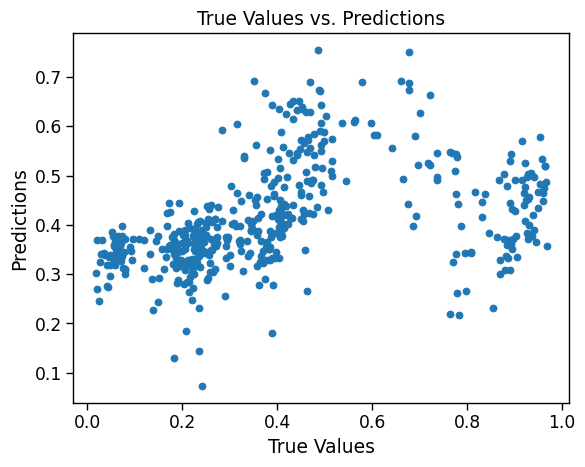

In [155]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.show()

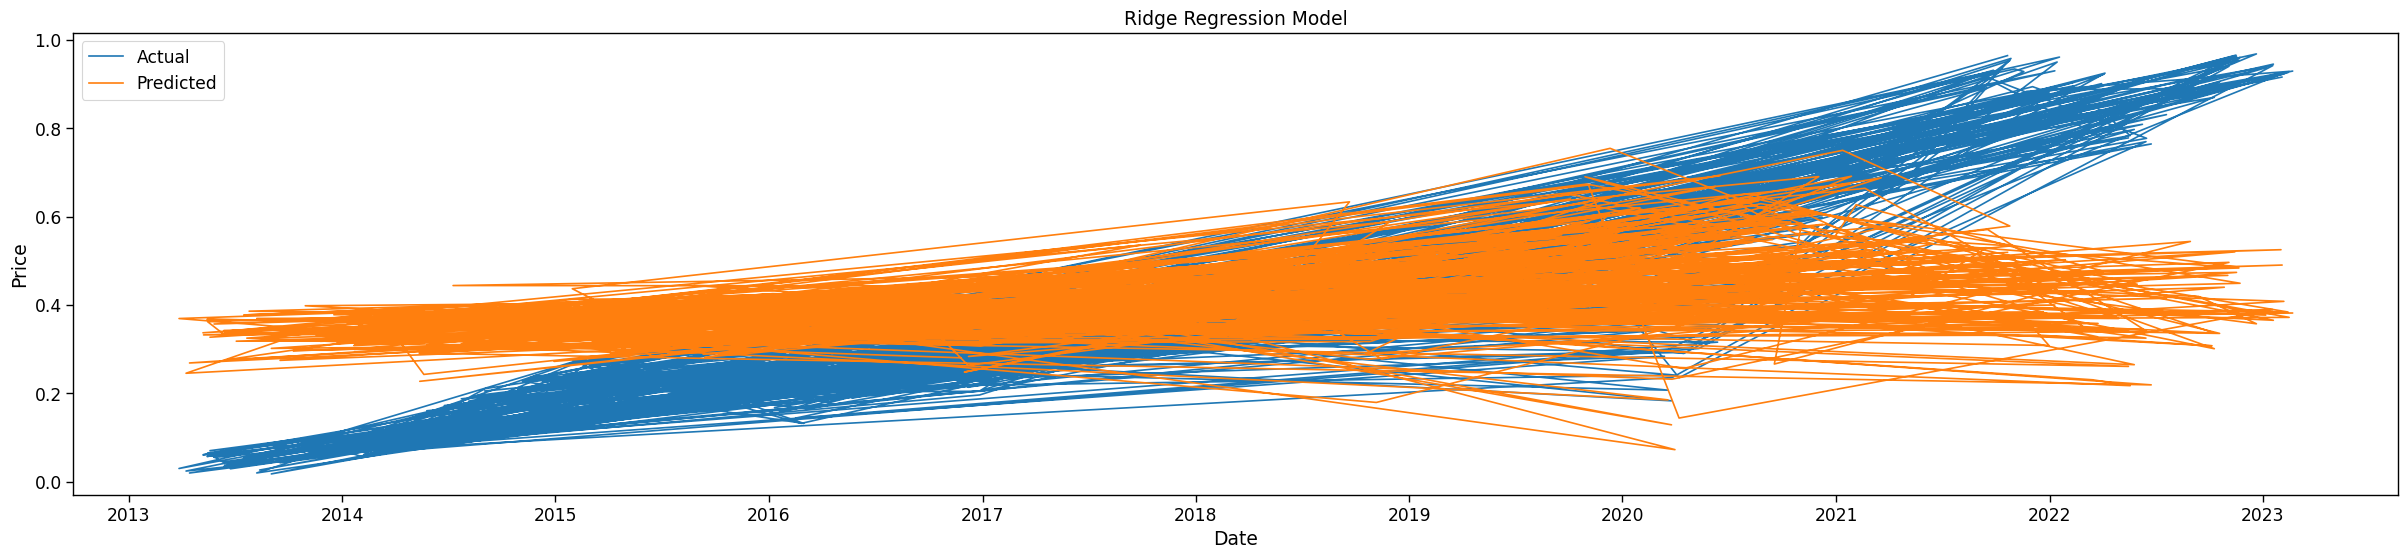

In [156]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values of the target variable against time
plt.figure(figsize=(30, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ridge Regression Model')
plt.legend()
plt.show()


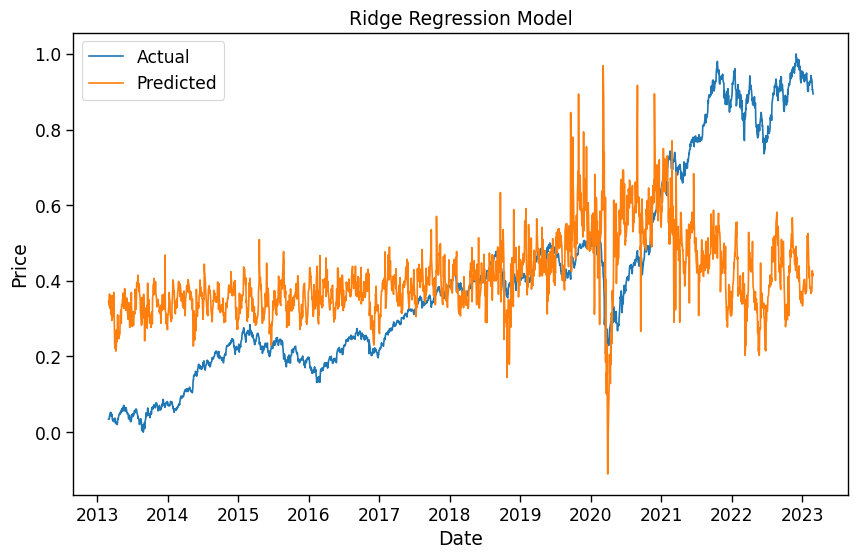

In [157]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values of the target variable against time
plt.figure(figsize=(10, 6))
plt.plot(target.index, target, label='Actual')
plt.plot(target.index, ridge_best.predict(features), label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Ridge Regression Model')
plt.legend()
plt.show()


## **Support Vector Regression**

#### **Without GridSearch**

In [158]:
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Without grid search
svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred = svr.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
nrmse = rmse / (y_test.max() - y_test.min())
r2 = r2_score(y_test, y_pred)
print("SVR without grid search:")
print("MAE:", mae)
print("RMSE:", rmse)
print("NRMSE:", nrmse)
print("R2 Score:", r2)

SVR without grid search:
MAE: 0.1133003033094945
RMSE: 0.16373984091247065
NRMSE: 0.1673673458130801
R2 Score: 0.5976812834986627


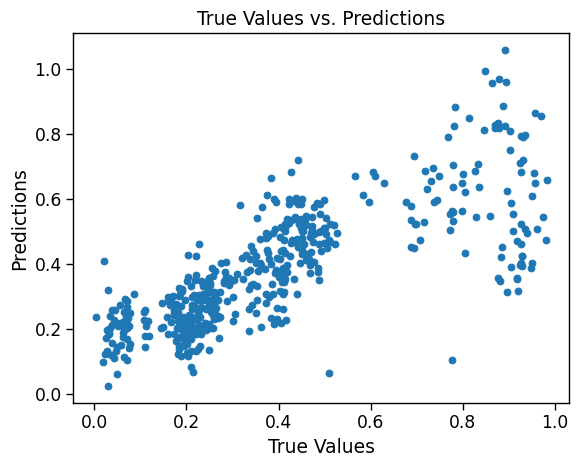

In [159]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.show()

#### **With GridSearch**

In [160]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Define parameter grid for grid search
param_grid = {'C': [0.1, 1, 10, 100], 
              'gamma': [0.1, 1, 10, 100], 
              'epsilon': [0.1, 0.5, 1]}

# Define SVR model with RBF kernel
svr = SVR(kernel='rbf')

# Define grid search over hyperparameters
grid_search = GridSearchCV(svr, param_grid=param_grid, cv=5, n_jobs=-1)

# Fit the grid search to the training data
grid_search.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best hyperparameters for SVR:", grid_search.best_params_)
print("Best score for SVR:", grid_search.best_score_)

# Use the best model to make predictions on the test data
best_svr = grid_search.best_estimator_
y_pred = best_svr.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
nrmse = rmse / (y_test.max() - y_test.min())
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("NRMSE:", nrmse)
print("R2 score:", r2)


Best hyperparameters for SVR: {'C': 10, 'epsilon': 0.1, 'gamma': 10}
Best score for SVR: 0.734550103635956
MAE: 0.10707329401189802
RMSE: 0.14262117938920477
NRMSE: 0.14611809783618668
R2 score: 0.7016167720368318


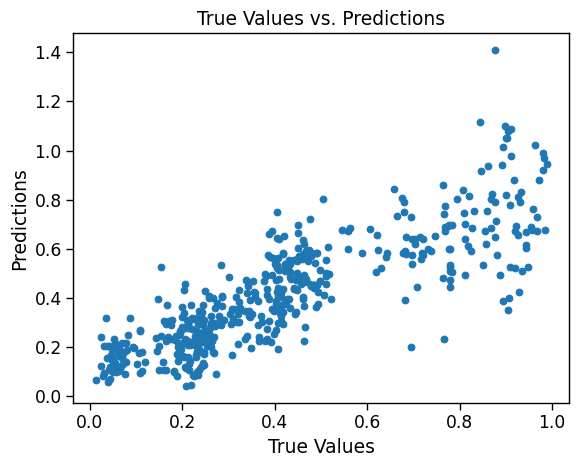

In [161]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.show()

#### **Feature Importance of SVR**

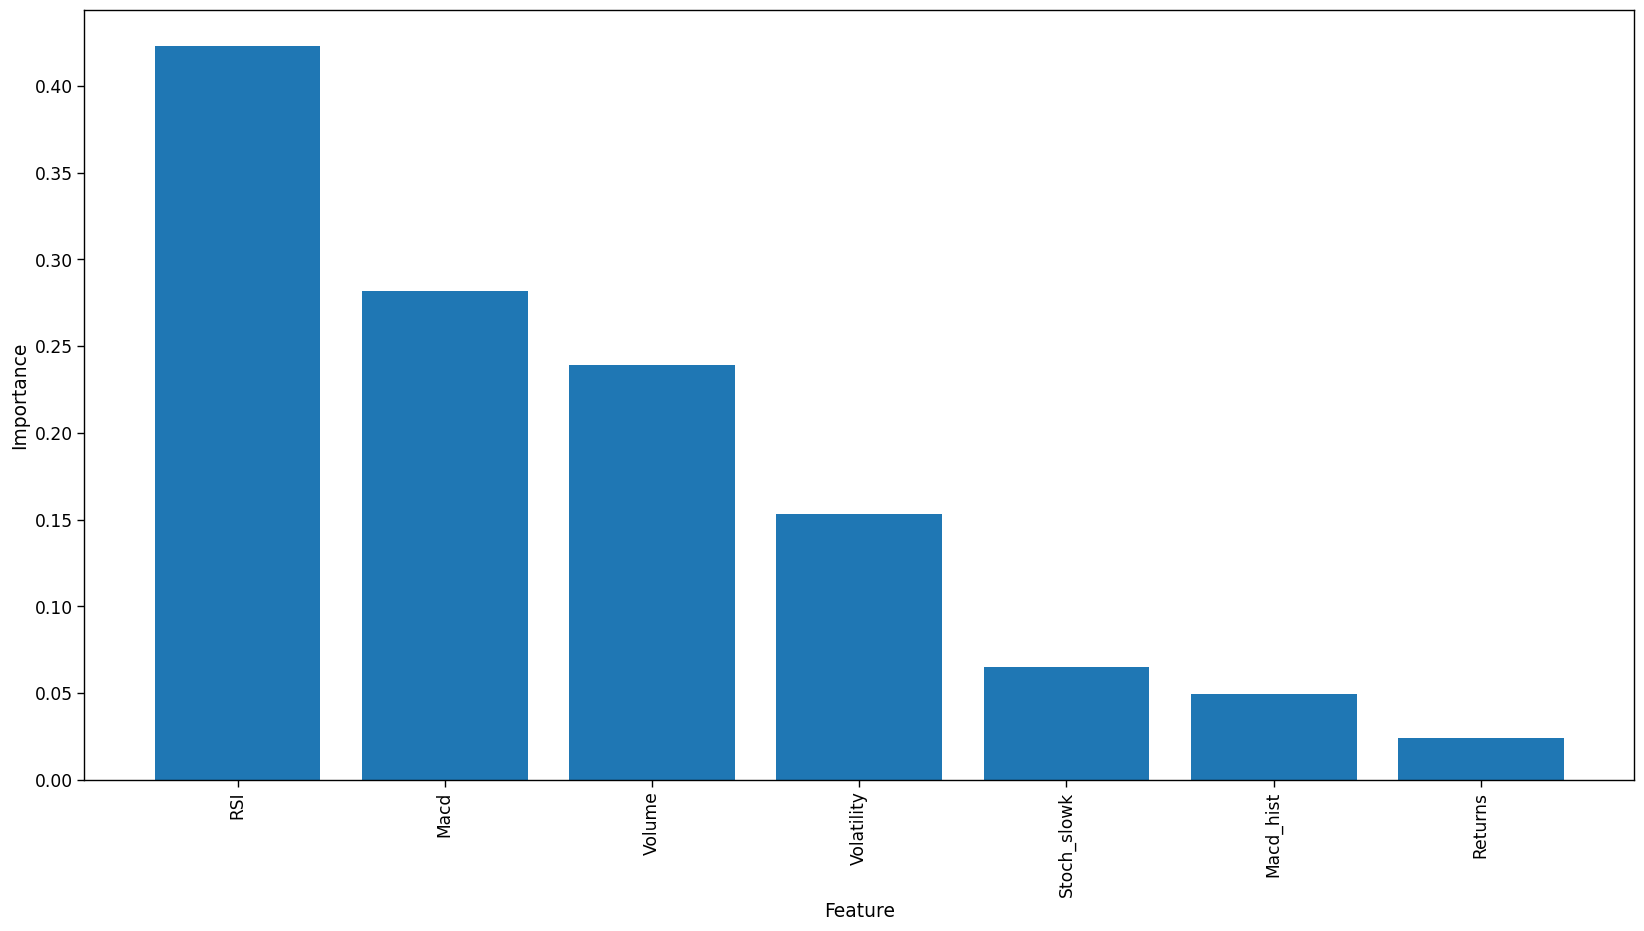

In [162]:
from sklearn.inspection import permutation_importance

# Create an SVR model with the desired hyperparameters
svr = SVR(kernel='rbf', C=10, epsilon=0.1,gamma=0.1)

# Fit the model to the training data
svr.fit(X_train, y_train)

# Get the feature importance using permutation feature importance
result = permutation_importance(svr, X_test, y_test, n_repeats=10, random_state=42)

# Plot the feature importance
importance = result.importances_mean
indices = importance.argsort()[::-1]

fig=plt.figure(figsize=(20,10))
plt.bar(range(X_test.shape[1]), importance[indices])
plt.xticks(range(X_test.shape[1]), X_test.columns[indices], rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()


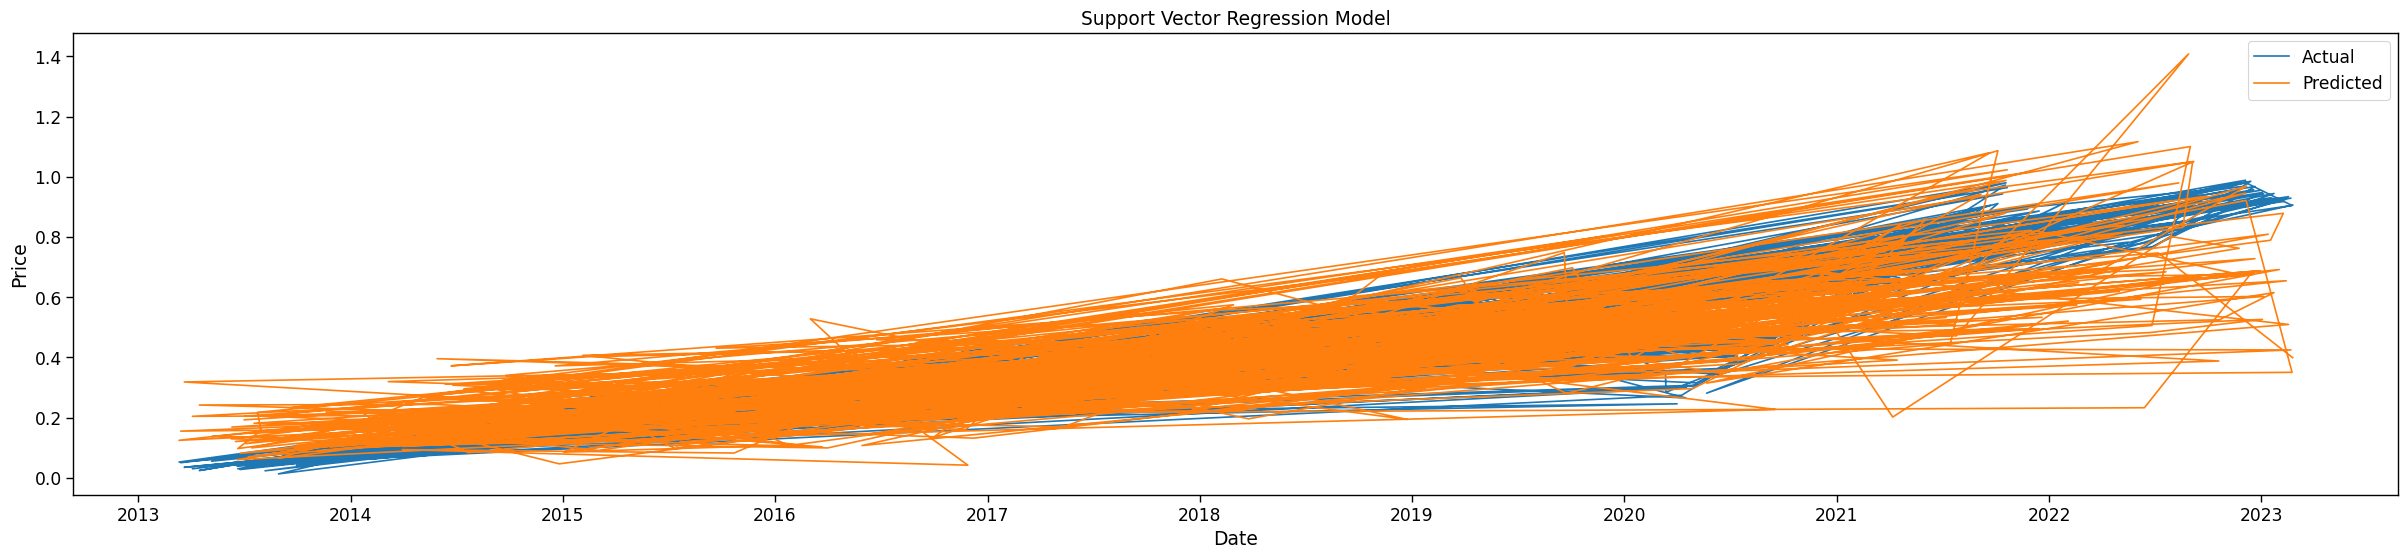

In [163]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values of the target variable against time
plt.figure(figsize=(30, 6))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression Model')
plt.legend()
plt.show()


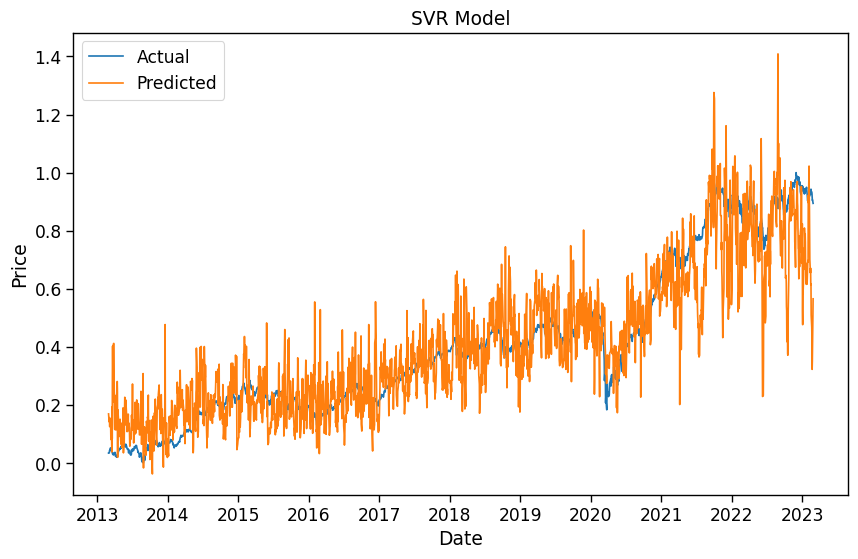

In [165]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values of the target variable against time
plt.figure(figsize=(10, 6))
plt.plot(target.index, target, label='Actual')
plt.plot(target.index, best_svr.predict(features), label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('SVR Model')
plt.legend()
plt.show()



## **Random Forest Regressor**

#### **Without GridSearch**

In [166]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import TimeSeriesSplit, train_test_split

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

# Initialize a random forest regression model
rf = RandomForestRegressor(n_estimators=100, max_depth=10, max_features='sqrt')

# Fit the model to the training data
rf.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
nrmse = rmse / (y_test.max() - y_test.min())
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Normalized Root Mean Squared Error: {nrmse:.2f}")
print(f"R^2 Score: {r2:.2f}")


Mean Absolute Error: 0.10
Root Mean Squared Error: 0.14
Normalized Root Mean Squared Error: 0.14
R^2 Score: 0.75


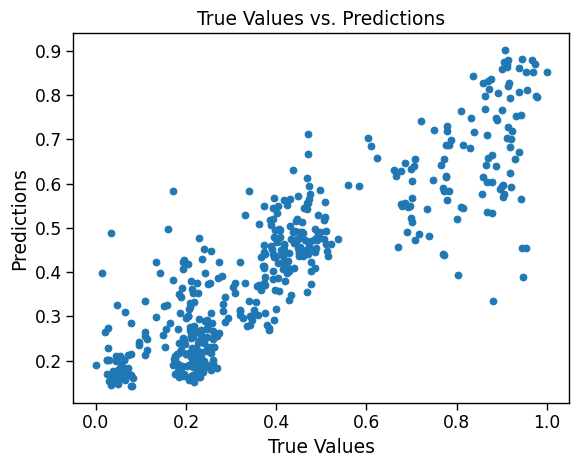

In [167]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.show()

#### **With GridSearch**

In [168]:
#import randomforestclassifier from sklearn.ensemble
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2)

#parameter grid to search over
param_grid = {'max_depth': [2, 6, 8, 10, 20], 'max_features': ['sqrt', 'log2', None]}

cv = TimeSeriesSplit(n_splits=5)

#the random forest model
rf = RandomForestRegressor(n_estimators=100)


# use GridSearchCV to find the best hyperparameters
rf_grid_search = GridSearchCV(rf, param_grid, cv=cv, n_jobs=-1)

rf_grid_search.fit(X_train, y_train)


# print the best hyperparameters
print("Best hyperparameters for random forest genotype: ", rf_grid_search.best_params_)


#Print best score corresponding to hyperparameters
print("Best score for random forest:", rf_grid_search.best_score_)


# Fit the model with the best hyperparameters
rf_model = rf_grid_search.best_estimator_
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
nrmse = rmse / (y_test.max() - y_test.min())
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print(f"Mean Absolute Error: {mae:.2f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Normalized Root Mean Squared Error: {nrmse:.2f}")
print(f"R^2 Score: {r2:.2f}")

Best hyperparameters for random forest genotype:  {'max_depth': 20, 'max_features': None}
Best score for random forest: 0.6763240061897968
Mean Absolute Error: 0.09
Root Mean Squared Error: 0.13
Normalized Root Mean Squared Error: 0.14
R^2 Score: 0.76


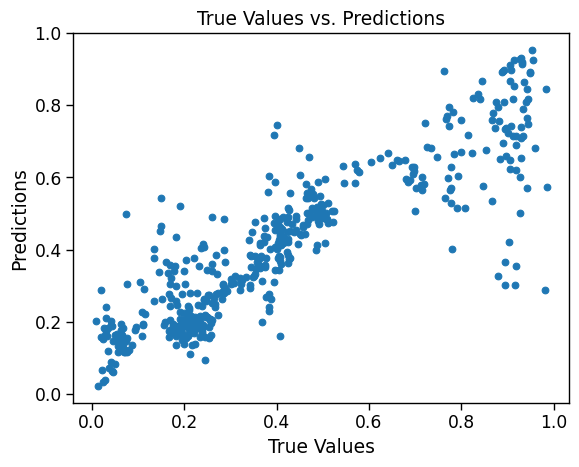

In [170]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.show()

#### **Feature Importance of RF**

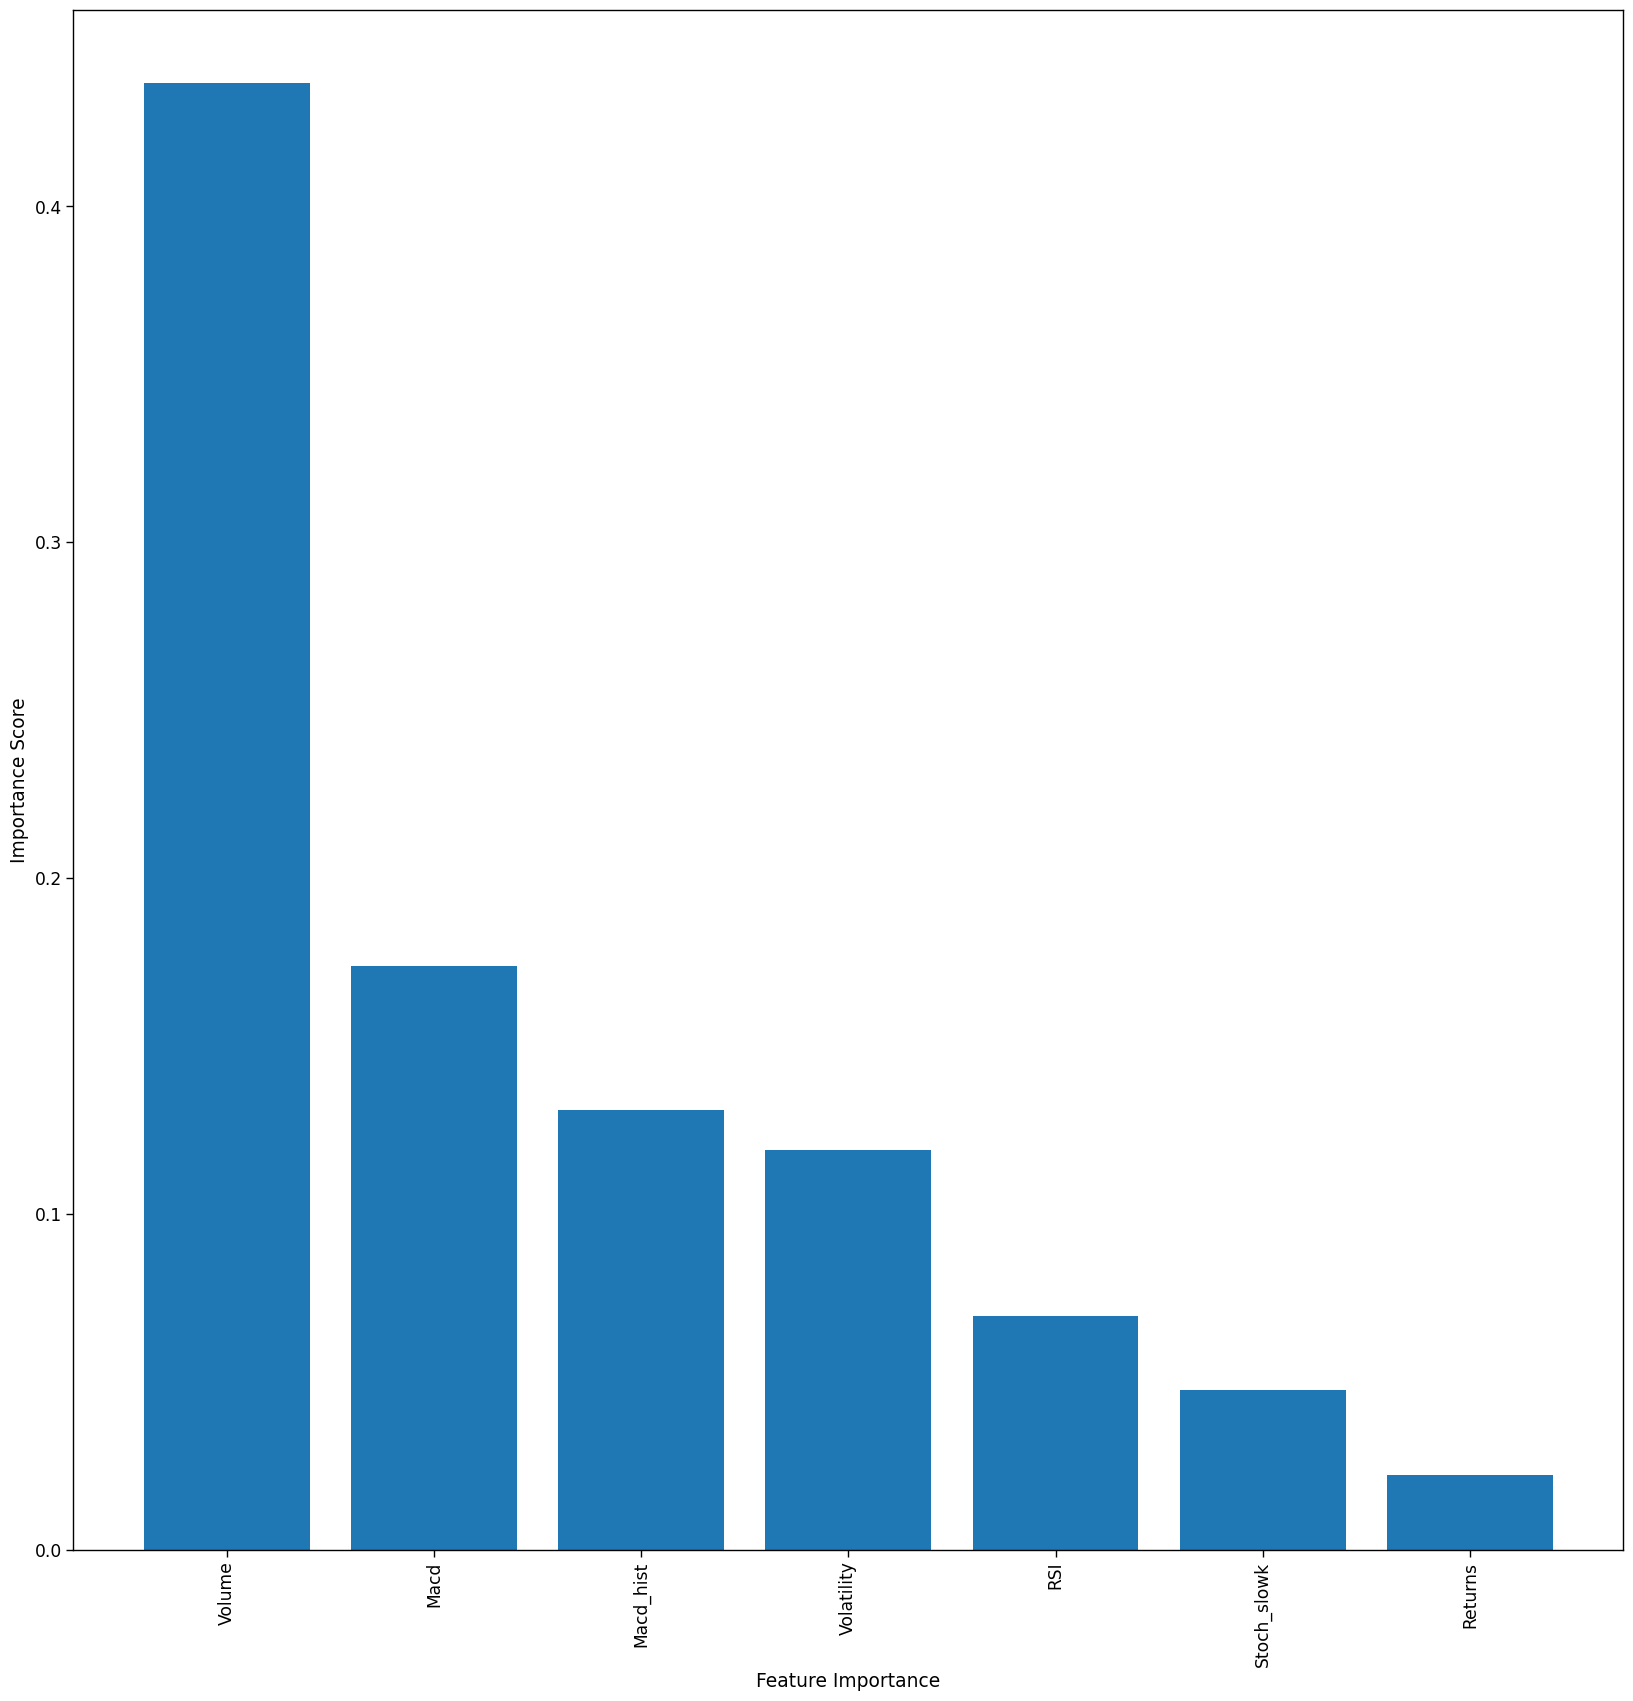

In [171]:
from sklearn.ensemble import RandomForestRegressor

#random forest classifier
rf = RandomForestRegressor(n_estimators=100, max_depth=20, max_features=None)
rf.fit(X_train, y_train)

# Sort the feature importances in descending order
sort_indices = rf.feature_importances_.argsort()[::-1]

#plot the feature importances
fig=plt.figure(figsize=(20,20))
plt.bar(range(X_train.shape[1]), rf.feature_importances_[sort_indices])
plt.xticks(range(X_train.shape[1]), X_train.columns[sort_indices], rotation=90)
plt.xlabel("Feature Importance")
plt.ylabel("Importance Score")
plt.show()

#### **Actual (y_test) vs Predicted (y_pred)**

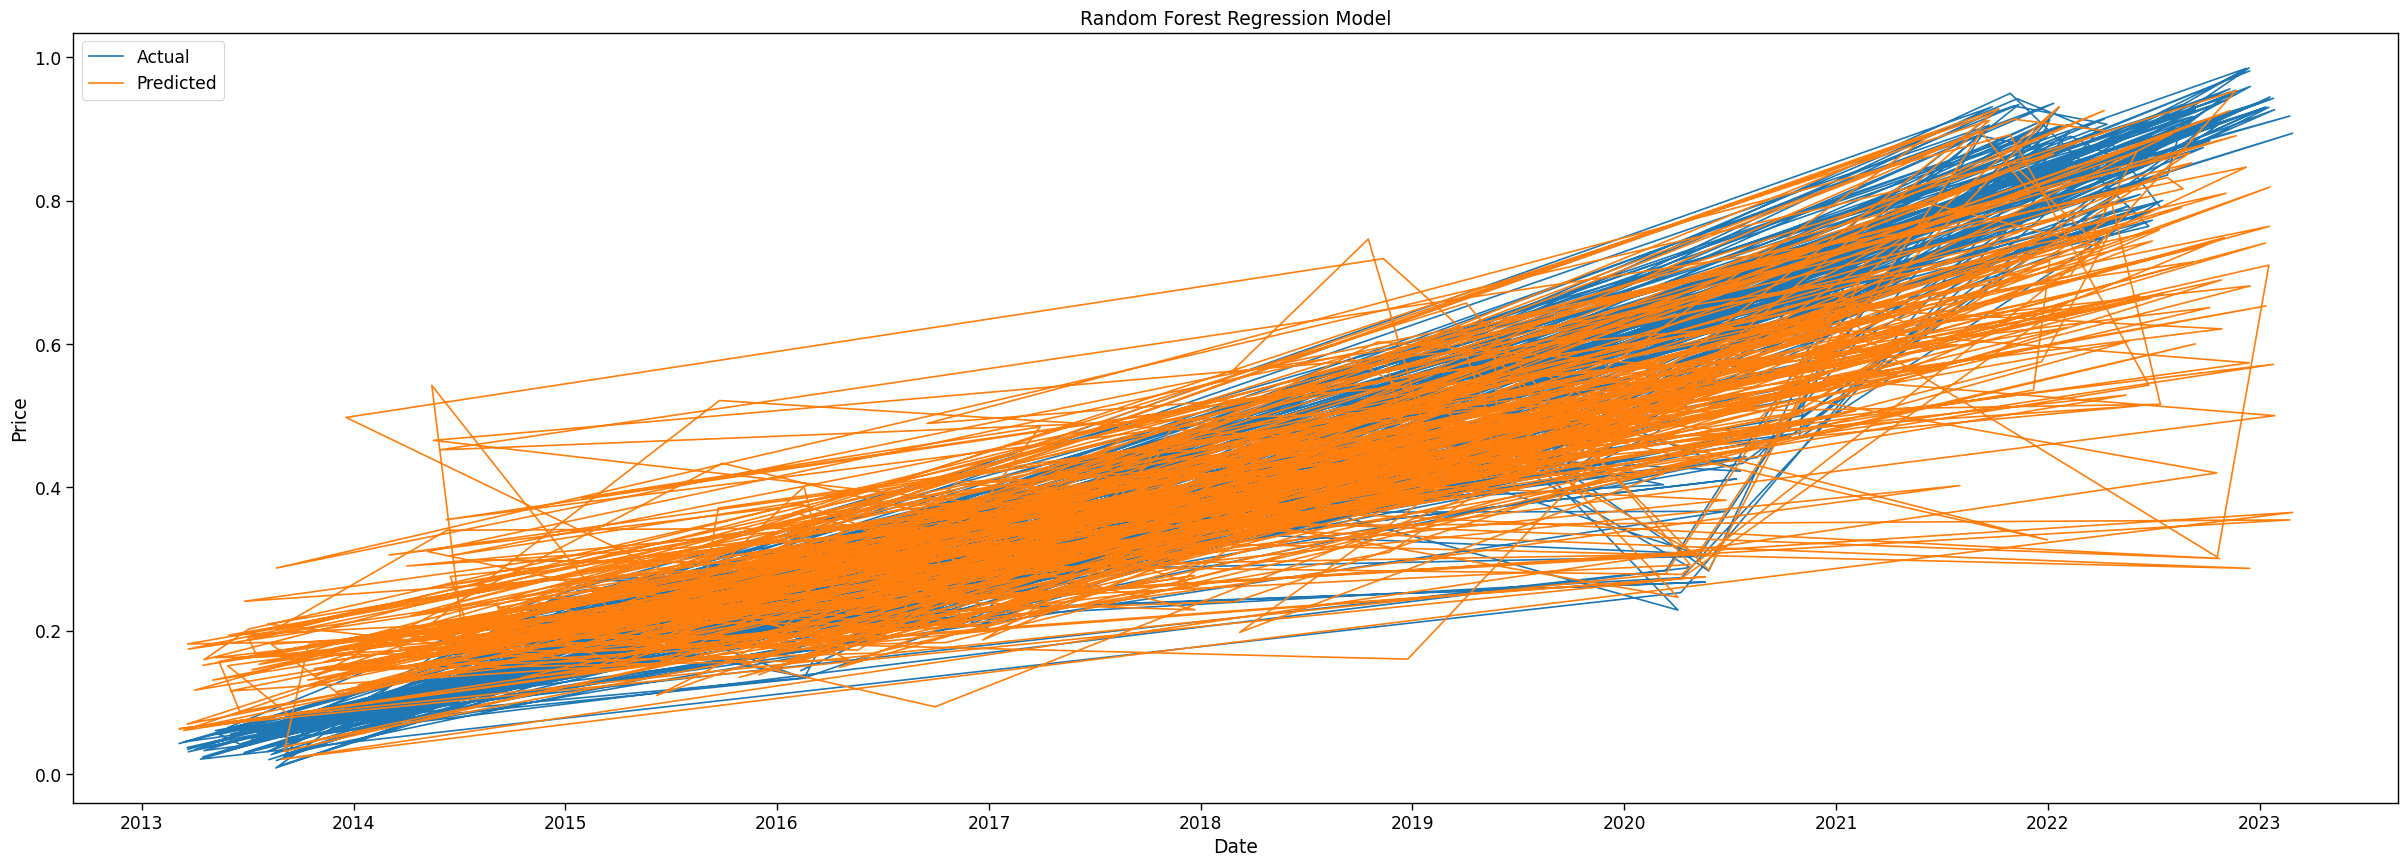

In [172]:
import matplotlib.pyplot as plt
y_pred = rf_model.predict(X_test)

# Plot the actual and predicted values of the target variable against time
plt.figure(figsize=(30, 10))
plt.plot(y_test.index, y_test, label='Actual')
plt.plot(y_test.index, y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Random Forest Regression Model')
plt.legend()
plt.show()


#### Actual vs Predicted 

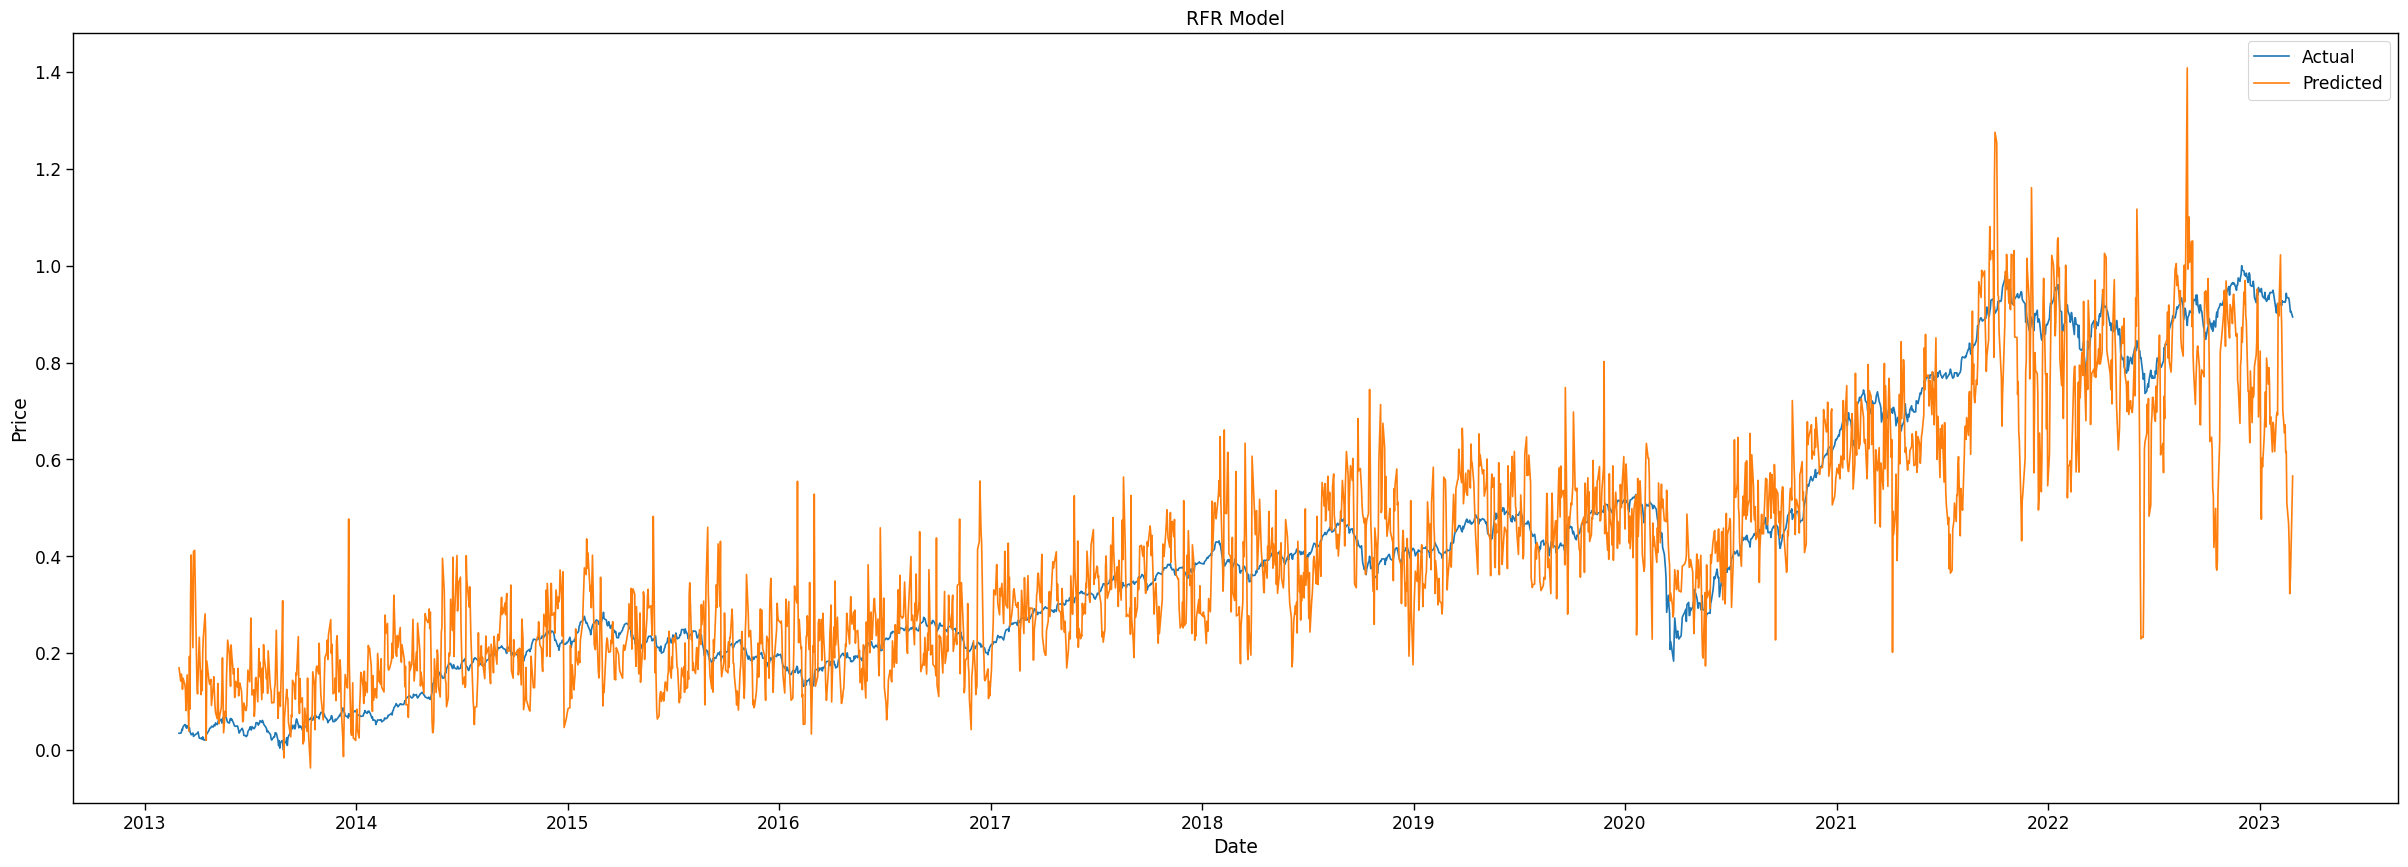

In [173]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values of the target variable against time
plt.figure(figsize=(30, 10))
plt.plot(target.index, target, label='Actual')
plt.plot(target.index, best_svr.predict(features), label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('RFR Model')
plt.legend()
plt.show()



## **LSTM Model**

In [174]:
import tensorflow.keras as keras
from keras.optimizers import Adam
from keras.models import Sequential
from keras.layers import LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split

# Creating feature and target datasets for LSTM
X, y = [], []
for i in range(30, features.shape[0]):
    X.append(features.iloc[i-30:i, :])  # Selecting columns from 'Volume' to 'Macd_hist'
    y.append(target.iloc[i])        # Selecting the 'adj close' column

X, y = np.array(X), np.array(y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = Sequential()

# 1st LSTM layer
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))

# 2nd LSTM layer
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))

# 3rd LSTM layer
model.add(LSTM(units=50))
model.add(Dropout(0.2))

# Output layer
model.add(Dense(units=1))

optimiser = Adam(learning_rate=0.001)

model.compile(optimizer=optimiser, loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=64)
model.summary()

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred, squared=False)
nrmse = rmse / (y_test.max() - y_test.min())
r2 = r2_score(y_test, y_pred)

# Print the evaluation metrics
print("MAE:", mae)
print("RMSE:", rmse)
print("NRMSE:", nrmse)
print("R-squared:", r2)

Epoch 1/50
31/31 [==============================] - 8s 64ms/step - loss: 0.0833
Epoch 2/50
31/31 [==============================] - 2s 63ms/step - loss: 0.0618
Epoch 3/50
31/31 [==============================] - 2s 65ms/step - loss: 0.0580
Epoch 4/50
31/31 [==============================] - 2s 67ms/step - loss: 0.0517
Epoch 5/50
31/31 [==============================] - 2s 66ms/step - loss: 0.0517
Epoch 6/50
31/31 [==============================] - 2s 67ms/step - loss: 0.0410
Epoch 7/50
31/31 [==============================] - 2s 67ms/step - loss: 0.0370
Epoch 8/50
31/31 [==============================] - 2s 65ms/step - loss: 0.0356
Epoch 9/50
31/31 [==============================] - 2s 65ms/step - loss: 0.0339
Epoch 10/50
31/31 [==============================] - 2s 66ms/step - loss: 0.0340
Epoch 11/50
31/31 [==============================] - 2s 66ms/step - loss: 0.0307
Epoch 12/50
31/31 [==============================] - 2s 66ms/step - loss: 0.0316
Epoch 13/50
31/31 [==================

In [175]:
#### **y_test vs y_pred**

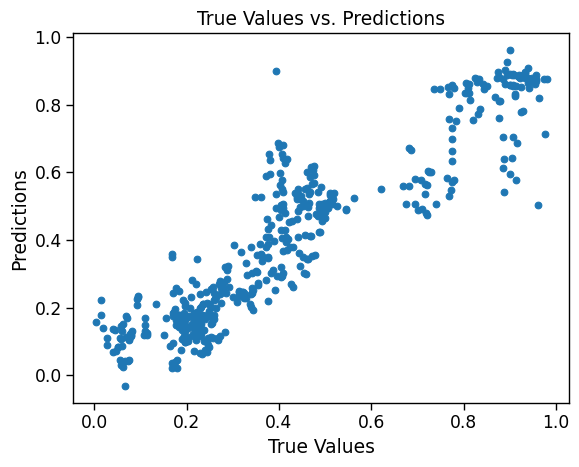

In [176]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_pred)
plt.xlabel("True Values")
plt.ylabel("Predictions")
plt.title("True Values vs. Predictions")
plt.show()



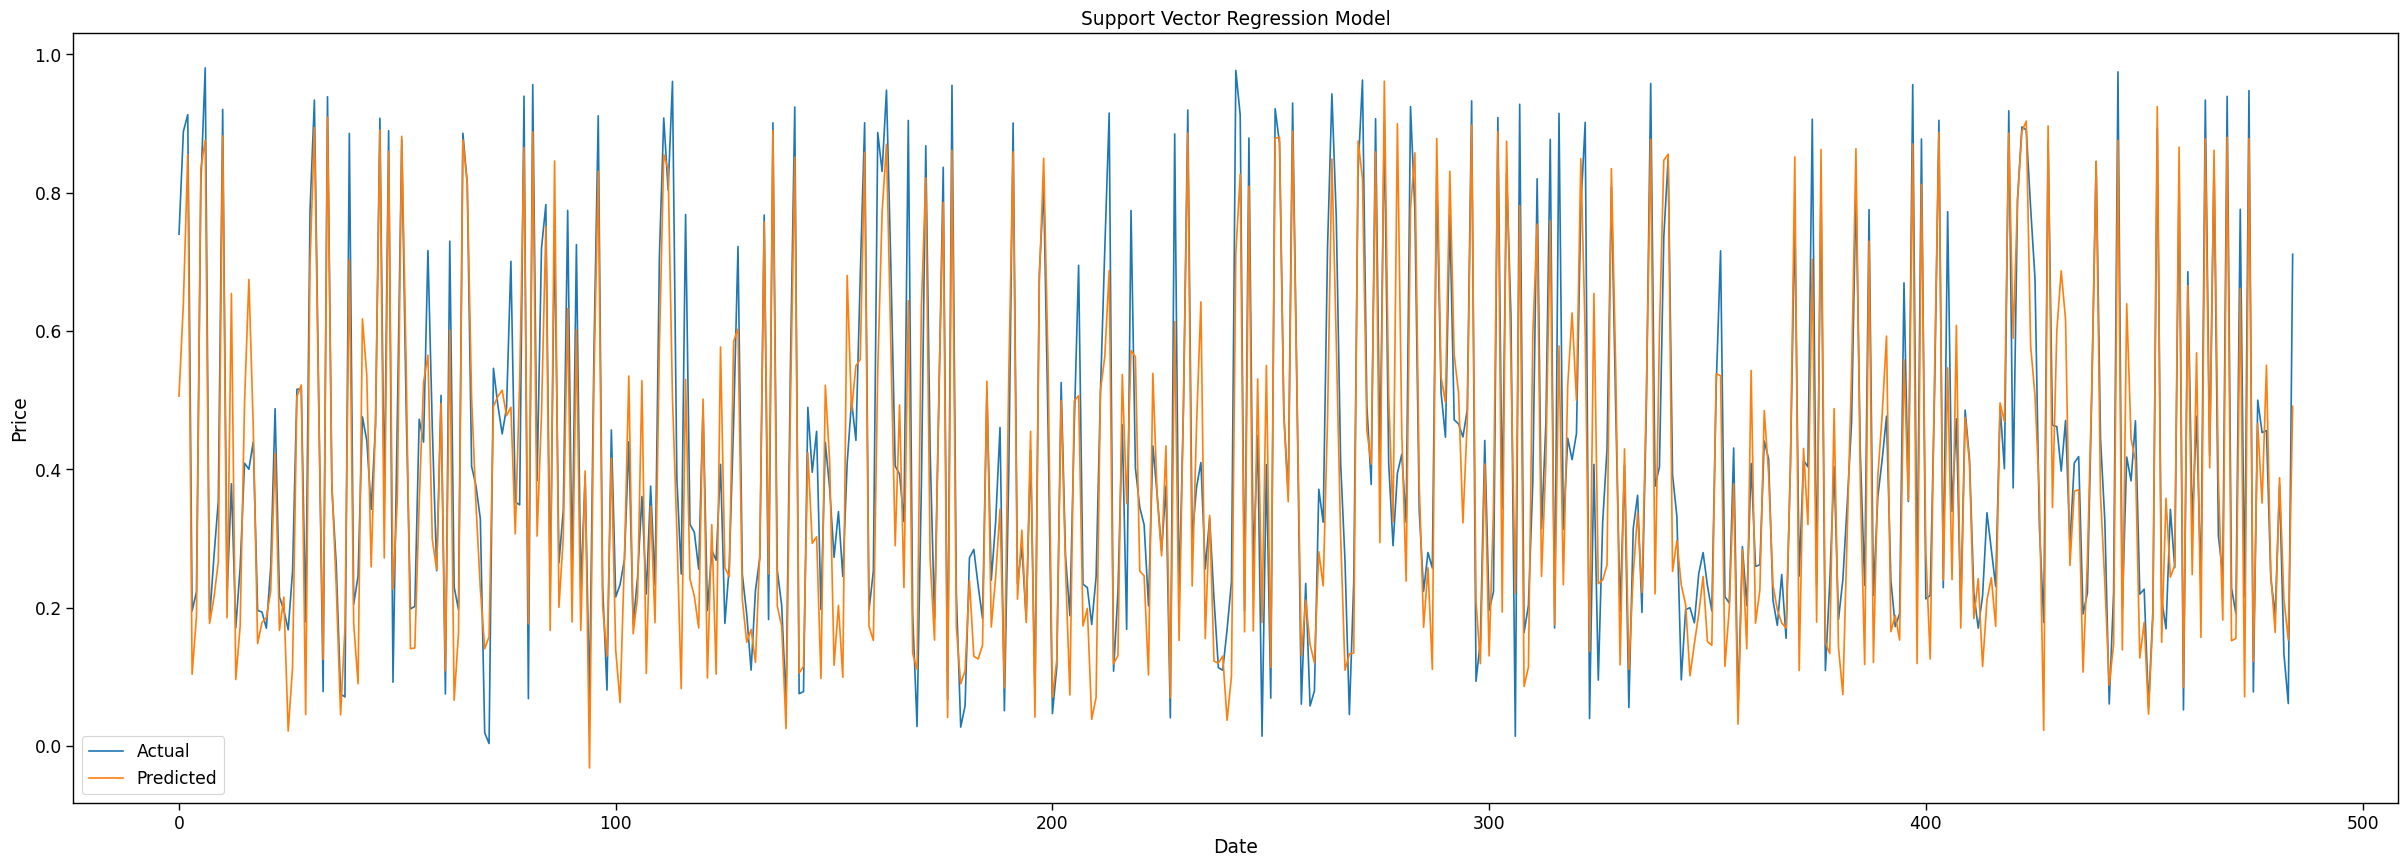

In [177]:
import matplotlib.pyplot as plt

# Plot the actual and predicted values of the target variable against time
plt.figure(figsize=(30, 10))
plt.plot(y_test, label='Actual')
plt.plot(y_pred, label='Predicted')
plt.xlabel('Date')
plt.ylabel('Price')
plt.title('Support Vector Regression Model')
plt.legend()
plt.show()

## **References**

Ray han 2023, How to drop out highly correlated features in Python? [source code]:https://www.projectpro.io/recipes/drop-out-highly-correlated-features-in-python

Pedregosa, F. et al., 2011. Scikit-learn: Machine learning in Python. Journal of machine learning research.

https://machinelearningmastery.com/time-series-prediction-lstm-recurrent-neural-networks-python-keras/
